## Description of Notebook

The notebook is used to compute entropy for the displayed VDFs and compare the corresponding change to the evolution of the perpendicular magnetic energy and anisotropy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import kineticsim_reader as kr
import pickle
import os
import random
from scipy.signal import savgol_filter
from tqdm import tqdm

In [2]:
simfiles = [\
'particles.d11_A0.5Hepp_beta0.5eps1e-4_256',\
'particles.d11_A0.75Hepp_beta1_256',\
'particles.d11_E11Ap3.3Aa2.0Vd0.42',\
'particles.d11_E11Ap4.3Aa1.6',\
'particles.d11_E11Ap4.3Aa1.6Vd0.32',\
'particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
'particles.d11_He++A10_256_iden0eps0',\
'particles.d11_He++v2_256_iden0eps1e-4t600',\
'particles.d11_He++vd1.5_256_iden0eps1e-4',\
'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
'particles.d11_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2a_128x3_iden0eps1e-4_dx0.75',\
'particles.d11_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'particles.d11_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
'particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
'particles.d11_vap1.2Ap1Aa0.75_rdna_0.05',\
'particles.d11_vap1.2Ap3.35Aa2.05rdna_0.007',\
'particles.d11_vap1.5Ap1.5Aa1rdna_0.007',\
'particles.d11_e260945ap1.30.5_1',\
'particles.d11_e260955ap2.20.4_2',\
'particles.d11_e261013ap1.50.6_3',\
'particles.d11_e261016ap1.70.6_4',\
'particles.d11_e261019ap1.50.4_5',\
'particles.d11_e261022ap1.40.4_6',\
'particles.d11_e261040ap1.40.4_7',\
'particles.d11_pv1.4av2Ap2Apb2betac0.214betab0.858_128_128x4_dx0.75',\
'particles.d11_pv2Ap2Apb2beta_pb0.429_128_128x2_dx0.75',\
'particles.d11_pv2av1.4Ap1Aa1betac0.214betab0.858_128_128x4_dx0.75',\
'particles.d11_pv2av1.4Ap2Aa2betac0.214betab0.858_128_128x4_dx0.75',\
'particles.d11_pv2av1.4Ap2Ab2beta0.429_128_128x4_dx0.75_t3000',\
'particles.d11_pv2av2Ap1Aa1beta0.429_128_128x4_dx0.75_t3000',\
'particles.d11_pv2av2Ap2Aa2beta0.429_128_128x4_dx0.75_t3000']


fldfiles = [\
'fields.d10_A0.5Hepp_beta0.5eps1e-4_256',\
'fields.d10_A0.75Hepp_beta1_256',\
'fields.d10_E11Ap3.3Aa2.0Vd0.42',\
'fields.d10_E11Ap4.3Aa1.6',\
'fields.d10_E11Ap4.3Aa1.6Vd0.32',\
'fields.d10_E12Ap1.86Aa1.0Vd0.32_512_256x256',\
'fields.d10_He++A10_256_iden0eps0',\
'fields.d10_He++v2_256_iden0eps1e-4t600',\
'fields.d10_He++vd1.5_256_iden0eps1e-4',\
'fields.d10_pv1.5_128_64_iden0eps1e-4_dx0.75_long',\
'fields.d10_pv1Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2a_128x3_iden0eps1e-4_dx0.75',\
'fields.d10_pv2Ap1Ab1betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2Ap1Ab2betac0.429betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2Ap2Apb2betac0.214betab0.858_128_128x2_dx0.75_t3000',\
'fields.d10_pv2av2.3_128x3_iden0eps1e-4_dx0.75',\
'fields.d10_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000',\
'fields.d10_vap1.2Ap1Aa0.75_rdna_0.05',\
'fields.d10_vap1.2Ap3.35Aa2.05rdna_0.007',\
'fields.d10_vap1.5Ap1.5Aa1rdna_0.007',\
'fields.d10_e260945ap1.30.5_1',\
'fields.d10_e260955ap2.20.4_2',\
'fields.d10_e261013ap1.50.6_3',\
'fields.d10_e261016ap1.70.6_4',\
'fields.d10_e261019ap1.50.4_5',\
'fields.d10_e261022ap1.40.4_6',\
'fields.d10_e261040ap1.40.4_7',\
'fields.d10_pv1.4av2Ap2Apb2betac0.214betab0.858_128_128x4_dx0.75',\
'fields.d10_pv2Ap2Apb2beta_pb0.429_128_128x2_dx0.75',\
'fields.d10_pv2av1.4Ap1Aa1betac0.214betab0.858_128_128x4_dx0.75',\
'fields.d10_pv2av1.4Ap2Aa2betac0.214betab0.858_128_128x4_dx0.75',\
'fields.d10_pv2av1.4Ap2Ab2beta0.429_128_128x4_dx0.75_t3000',\
'fields.d10_pv2av2Ap1Aa1beta0.429_128_128x4_dx0.75_t3000',\
'fields.d10_pv2av2Ap2Aa2beta0.429_128_128x4_dx0.75_t3000']

populations = [\
[0.9,0.05],\
[0.9,0.05],\
[0.986,0.007],\
[0.986,0.007],\
[0.986,0.007],\
[0.986,0.007],\
[0.9,0.05],\
[0.9,0.05],\
[0.9,0.05],\
[1.00,0.00],\
[1.00,0.00],\
[0.91,0.045],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[0.91,0.045],\
[0.91,0.045],\
[0.9,0.05],\
[0.986,0.007],\
[0.986,0.007],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[1.00,0.00],\
[0.91,0.045],\
[1.00,0.00],\
[0.91,0.045],\
[0.91,0.045],\
[0.91,0.045],\
[0.91,0.045],\
[0.91,0.045]]

## Entropies of VDFs in high resolution

In [9]:
# specifications of original VDFs:
# dimensions: timesteps x 320 x 320
# range: from -4 VA to 4 VA in every direction
# resolution: 0.025 VA

def calculate_entropy(vdf):
    if (np.sum(vdf) != 0.0): vdf_norm = np.copy(vdf/np.sum(vdf))
    entropy = np.zeros([vdf.shape[0]], dtype=float)
    for t in range (0, vdf.shape[0], 1):
        for i in range (0, vdf.shape[1], 1):
            for j in range (0, vdf.shape[2], 1):
                if (vdf[t,i,j] != 0.0): entropy[t] += -1*vdf[t,i,j]*np.log(vdf[t,i,j])
    return entropy


for simindex in range (0, len(simfiles), 1):

    labels_entropy_re = []
    
    simfile = simfiles[simindex]
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("-> SIMULATION: "+simfile)
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    # Reading the simulation
    if (simfile == 'particles.d11_pv1.5_128_64_iden0eps1e-4_dx0.75_long'):
        vdfp_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfp_array.npy')
        vdfhe_array_p1 = np.load('./processing_results/' + simfile + '_p1.vdfhe_array.npy')
        vdfp_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfp_array.npy')
        vdfhe_array_p2 = np.load('./processing_results/' + simfile + '_p2.vdfhe_array.npy')
        vdfp_array = np.concatenate((vdfp_array_p1, vdfp_array_p2))
        vdfhe_array = np.concatenate((vdfhe_array_p1, vdfhe_array_p2))
    else:
        vdfp_array = np.load('./processing_results/' + simfile + '.vdfp_array.npy')
        vdfhe_array = np.load('./processing_results/' + simfile + '.vdfhe_array.npy')
    entropy_p = calculate_entropy(vdfp_array)
    entropy_he = calculate_entropy(vdfhe_array)
    
    timep_array = np.load('./processing_results/' + simfile + '.timep_array.npy')
    
    # time derivatives (relative)
    dt_entropy_p = (entropy_p[1:]-entropy_p[:-1])/(timep_array[1:]-timep_array[:-1])
    dt_entropy_p = 2*(dt_entropy_p)/(entropy_p[1:]+entropy_p[:-1])
    if (entropy_he[0] == 0.0):
        dt_entropy_he = entropy_he*0.0
    else:
        dt_entropy_he = (entropy_he[1:]-entropy_he[:-1])/(timep_array[1:]-timep_array[:-1])
        dt_entropy_he = 2*(dt_entropy_he)/(entropy_he[1:]+entropy_he[:-1])
        
    for i in range (1, len(timep_array)-2, 1):
        labels_entropy_re.append([dt_entropy_p[i], dt_entropy_he[i]])
        
    if (simindex == 0):
        labels_entropy_re_all = labels_entropy_re
    else:
        labels_entropy_re_all = np.concatenate((labels_entropy_re_all, labels_entropy_re))
        

np.save('./mldata_vdfmoments/allsimulations.labels_entropy_re_all.npy', labels_entropy_re_all)

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.5Hepp_beta0.5eps1e-4_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_A0.75Hepp_beta1_256
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap3.3Aa2.0Vd0.42
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E11Ap4.3Aa1.6Vd0.32
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
-> SIMULATION: particles.d11_E12Ap1.86Aa1.0Vd0.32_512_256x256
^^^^^^^^^^^^^^^^^^^^

## Loading and visualizing all

In [12]:
labels_entropy_re_all = np.load('./mldata_vdfmoments/allsimulations.labels_entropy_re_all.npy')
labels_allmoments_me_re_all = np.load('./mldata_vdfmoments/allsimulations.labels_allmoments_me_re_all.npy')
labels_allmoments_an_re_all = np.load('./mldata_vdfmoments/allsimulations.labels_allmoments_an_re_all.npy')
simnames_all = np.load('./mldata_vdfmoments/allsimulations.simnames_all.npy')
timep_array_all = np.load('./mldata_vdfmoments/allsimulations.timep_array_all.npy')
print(labels_entropy_re_all.shape)
print(labels_allmoments_me_re_all.shape)
print(labels_allmoments_an_re_all.shape)
print(simnames_all.shape)
print(timep_array_all.shape)

(1596, 2)
(1596,)
(1596, 2)
(1596,)
(1596,)


In [13]:
istart_all = []
iend_all = []

active_simname = simnames_all[0]
istart = 0

for i in range(0, len(simnames_all), 1):
    if (simnames_all[i] != active_simname):
        iend = i-1
        istart_all.append(istart)
        iend_all.append(iend)
        # next
        active_simname = simnames_all[i]
        istart = i

istart_all.append(istart)
iend_all.append(len(simnames_all)-1)

print(istart_all)
print(iend_all)

[0, 78, 124, 170, 216, 262, 310, 356, 446, 524, 672, 730, 803, 861, 919, 977, 1038, 1073, 1095, 1117, 1147, 1160, 1173, 1186, 1199, 1212, 1225, 1238, 1296, 1306, 1364, 1422, 1480, 1538]
[77, 123, 169, 215, 261, 309, 355, 445, 523, 671, 729, 802, 860, 918, 976, 1037, 1072, 1094, 1116, 1146, 1159, 1172, 1185, 1198, 1211, 1224, 1237, 1295, 1305, 1363, 1421, 1479, 1537, 1595]


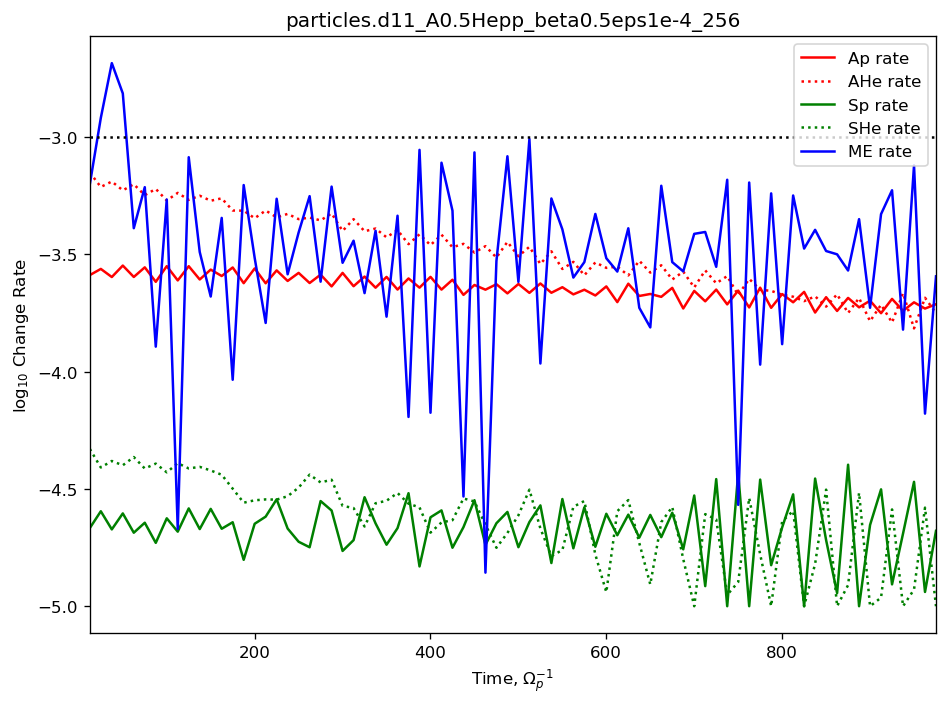

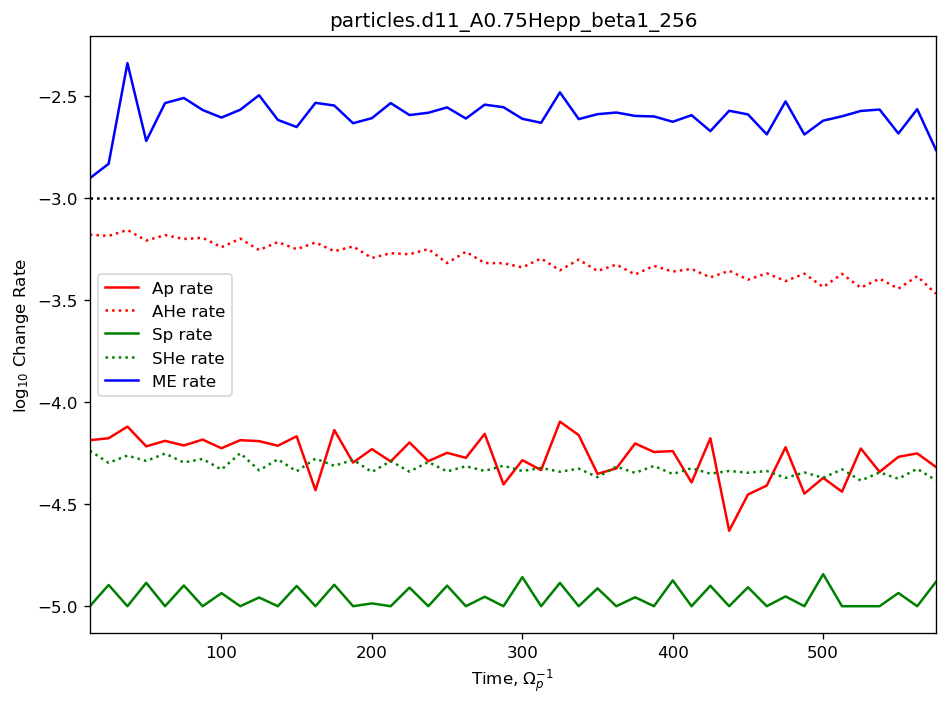

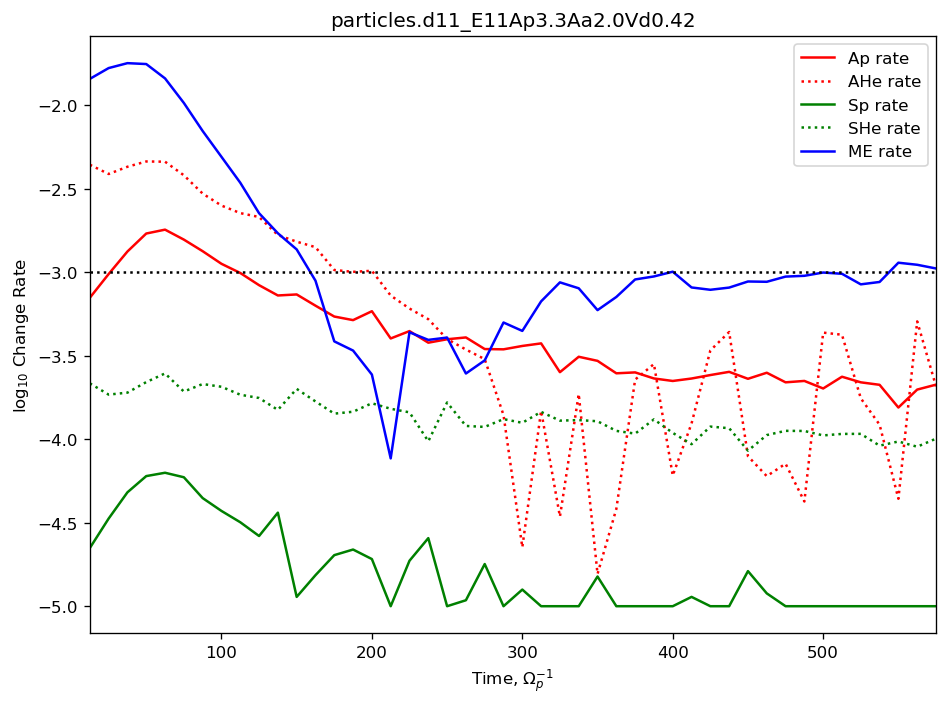

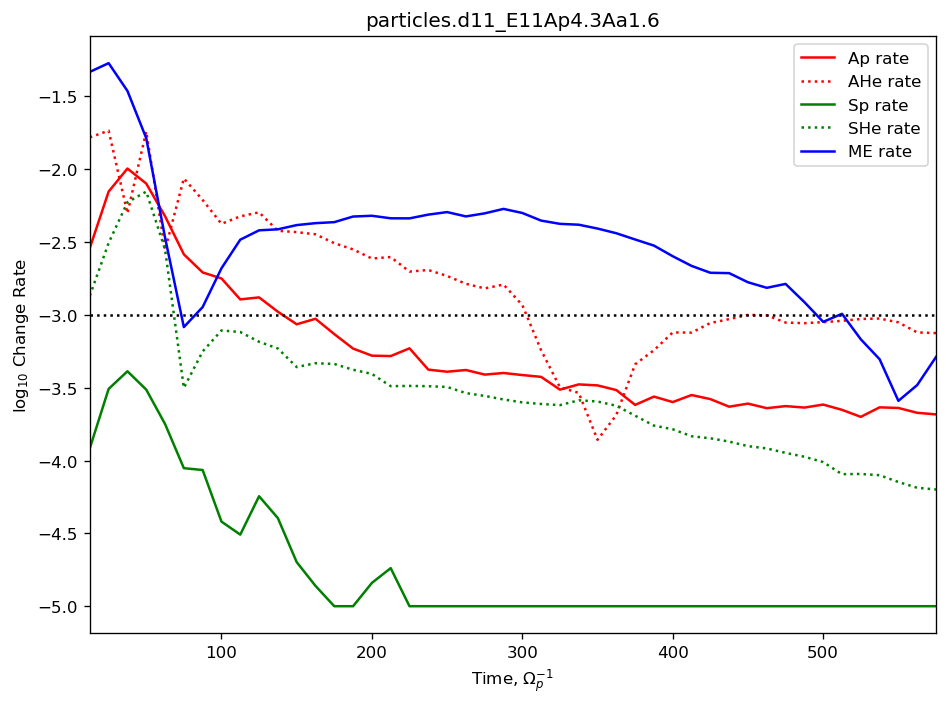

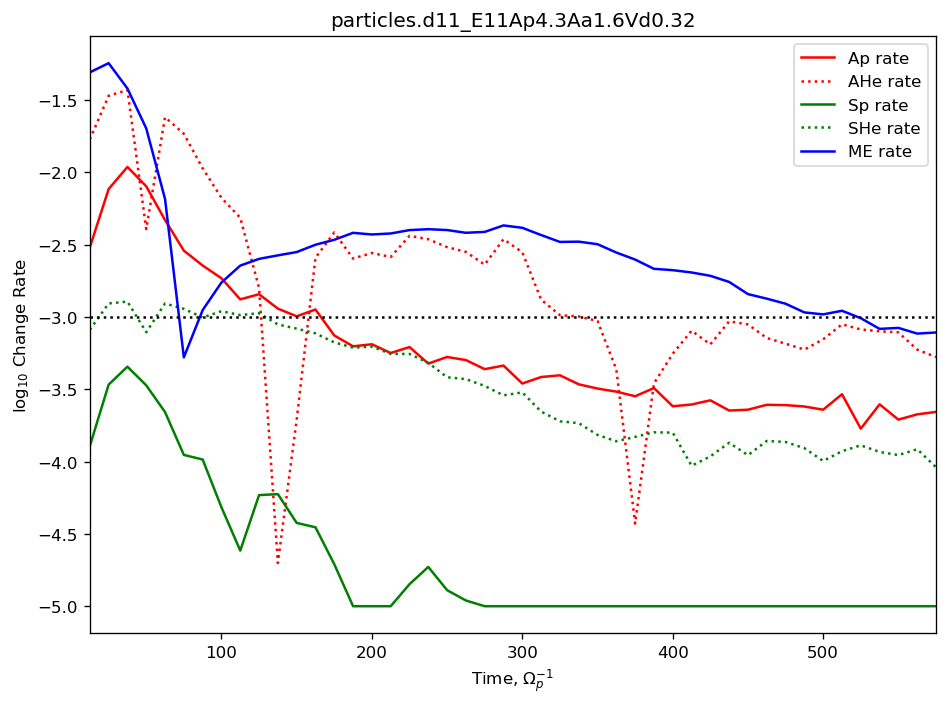

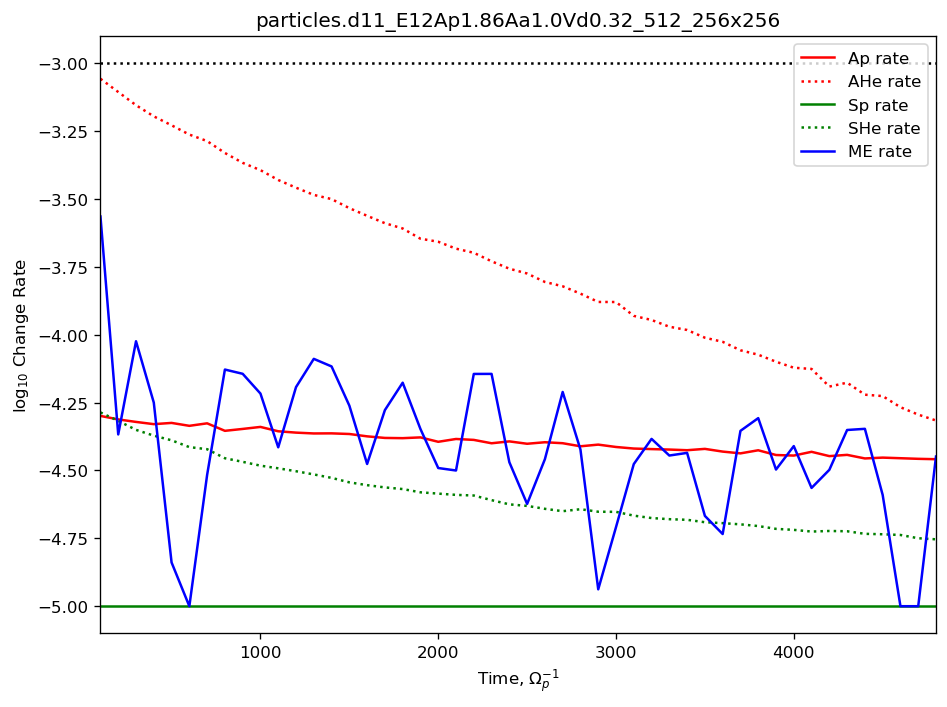

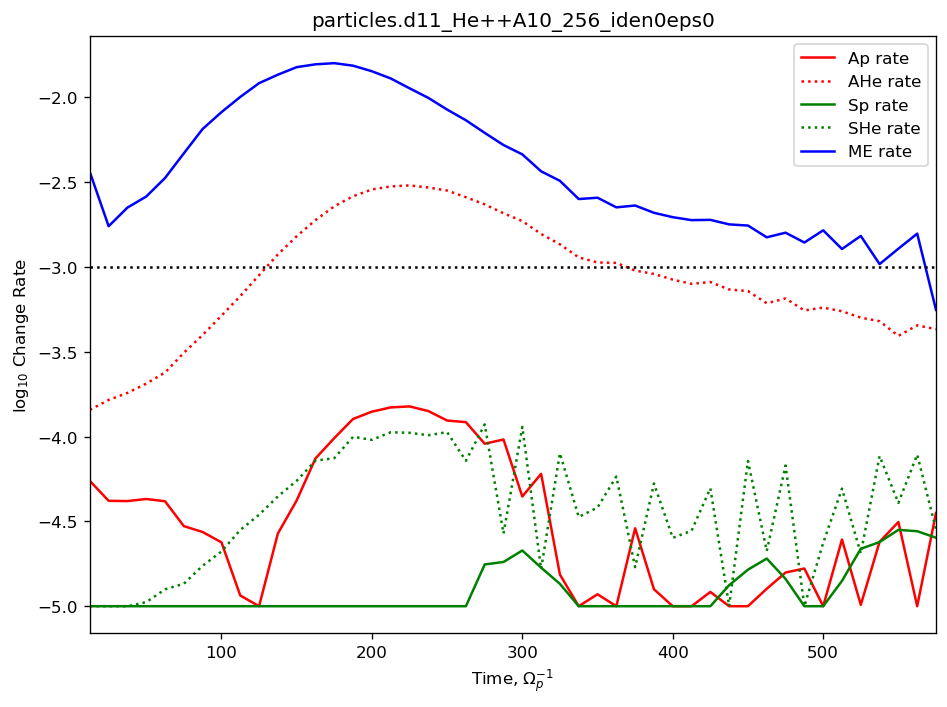

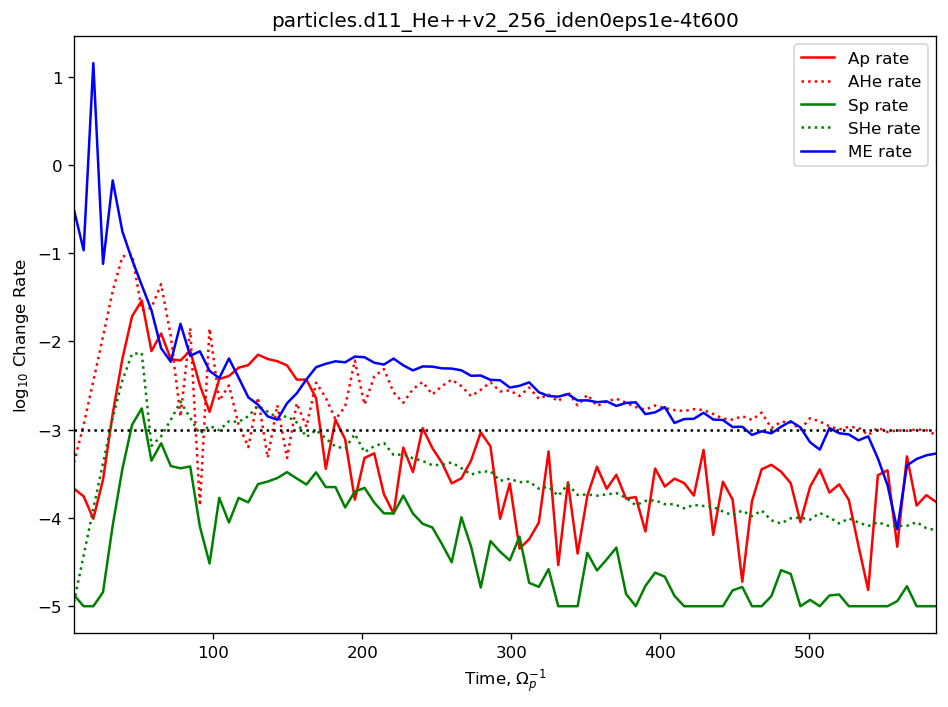

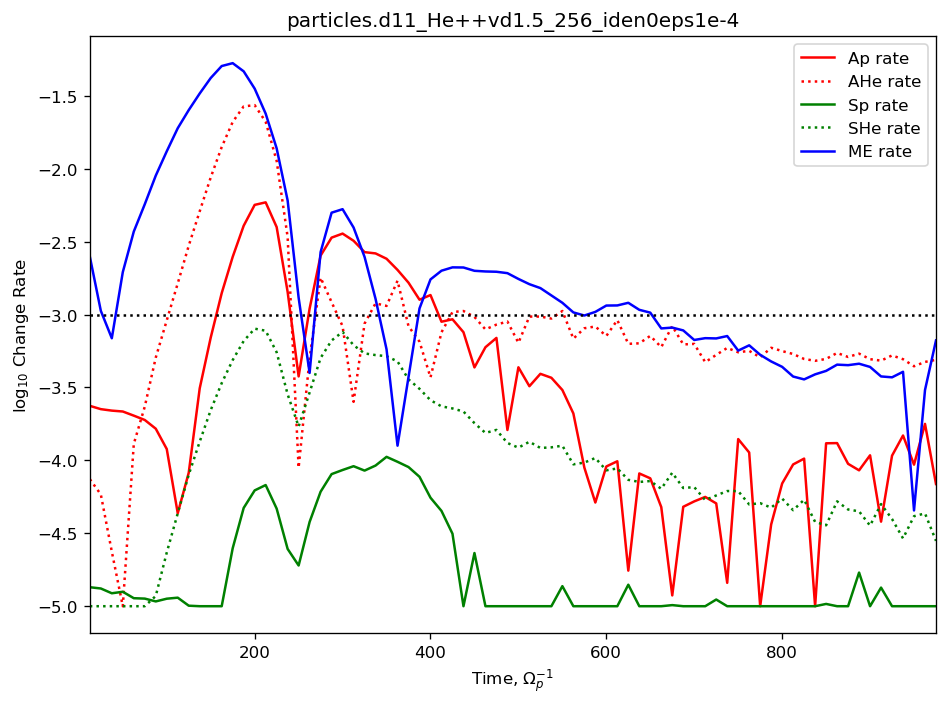

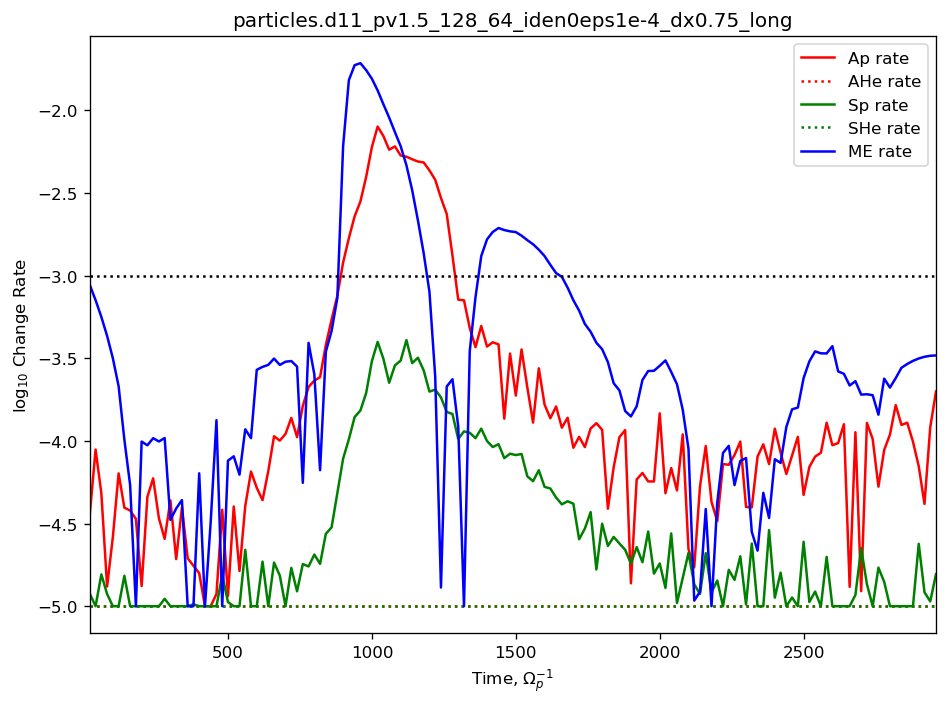

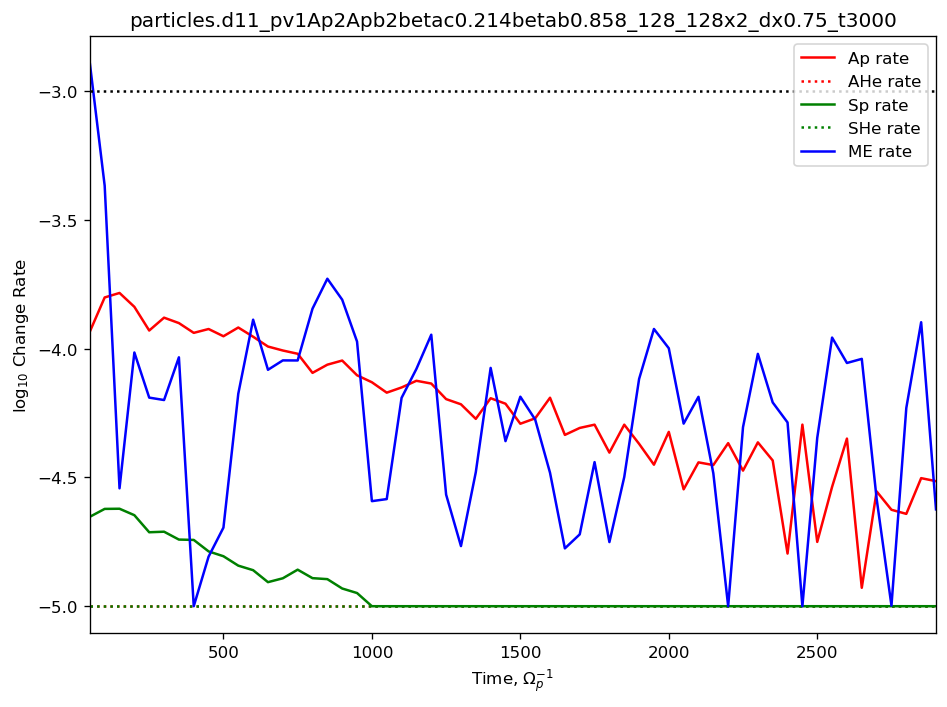

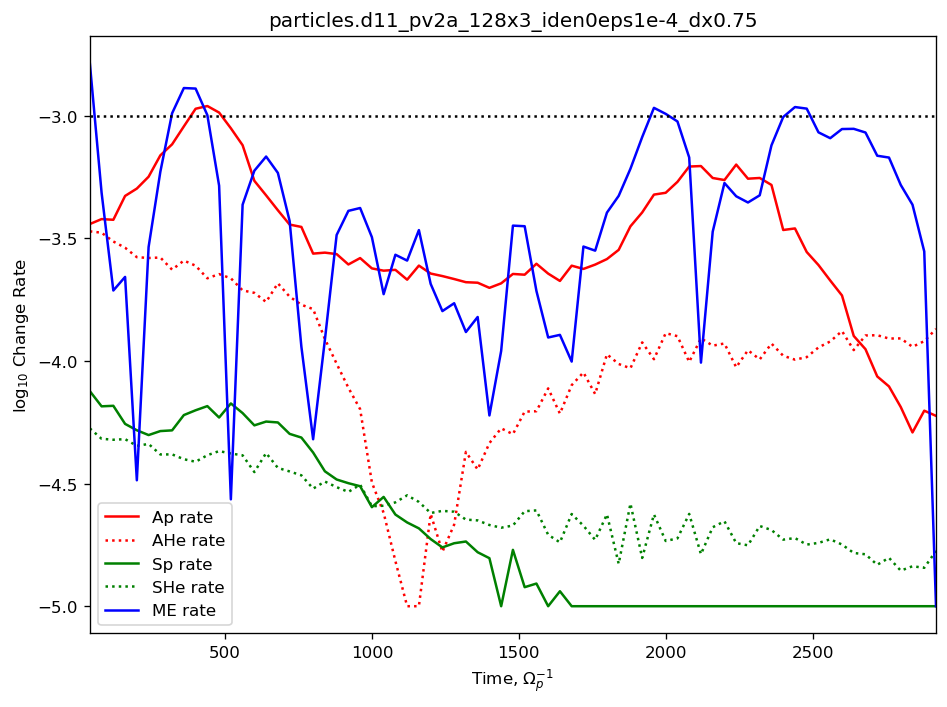

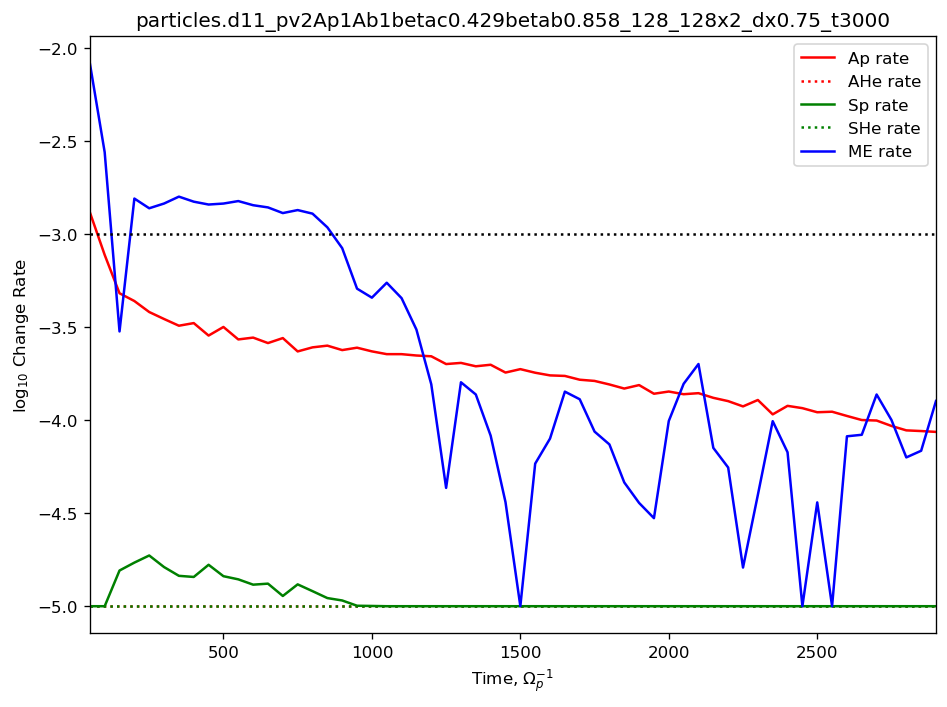

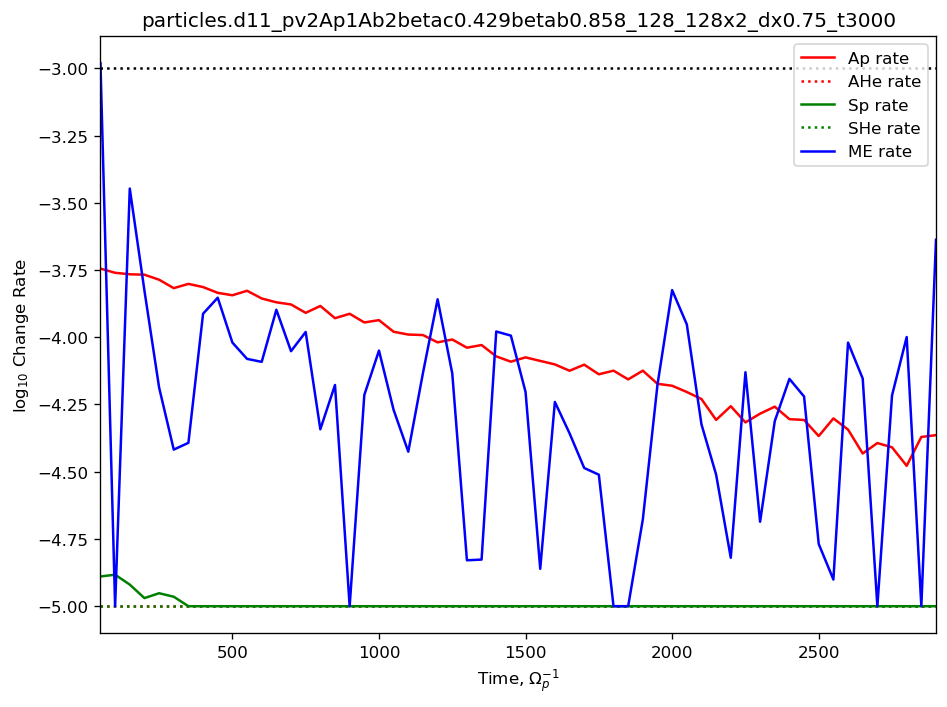

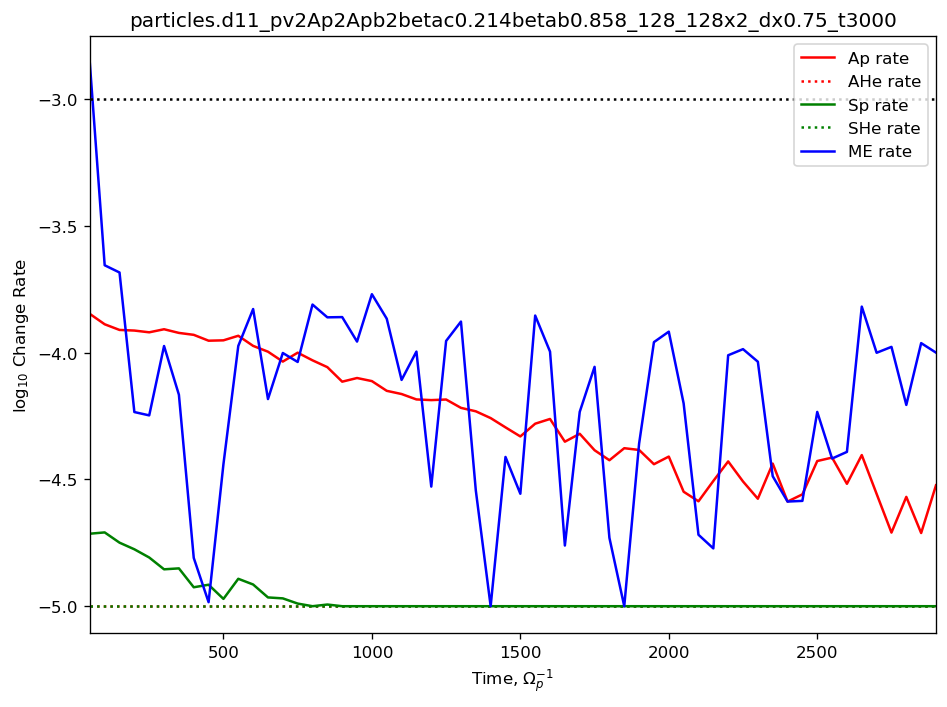

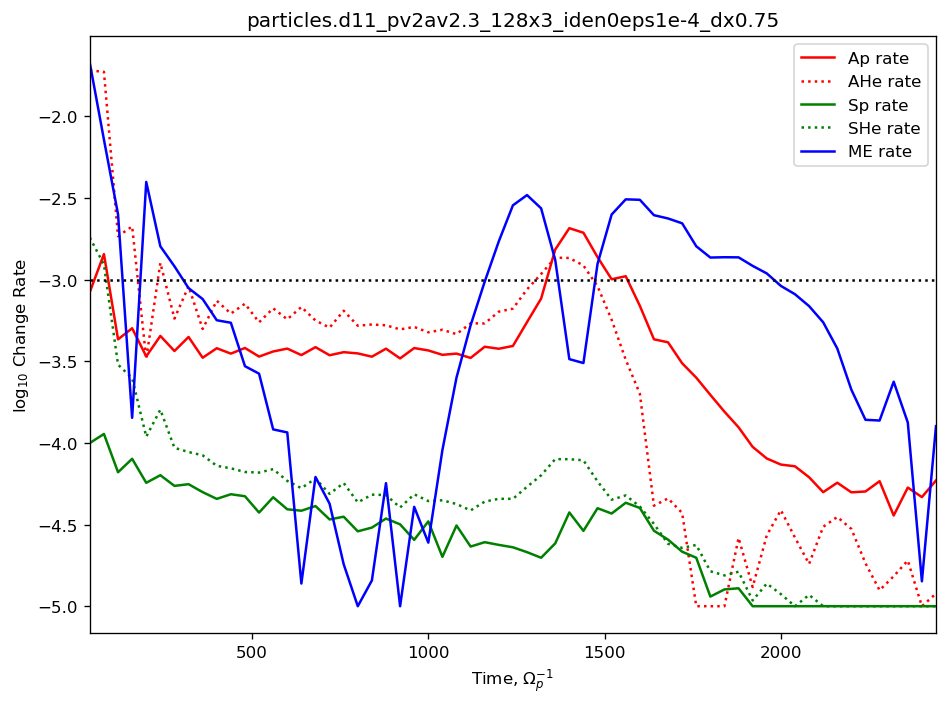

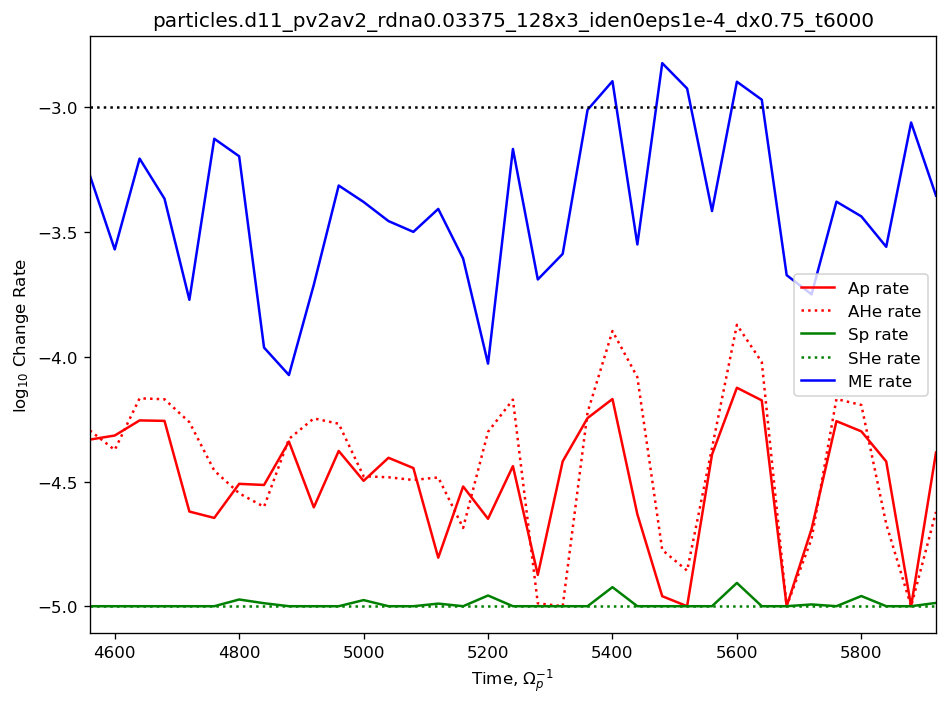

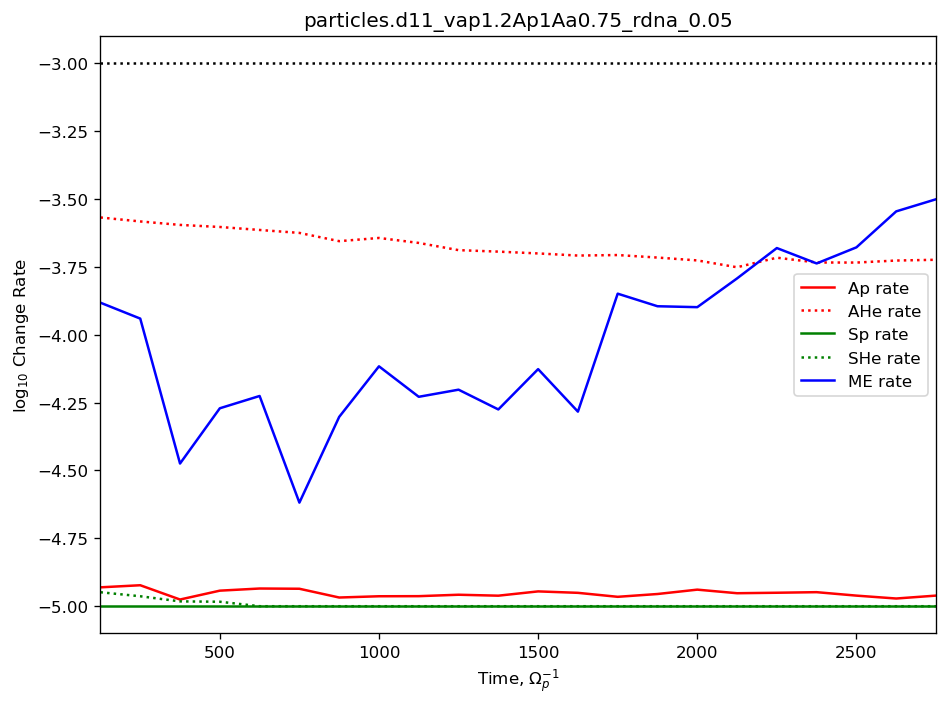

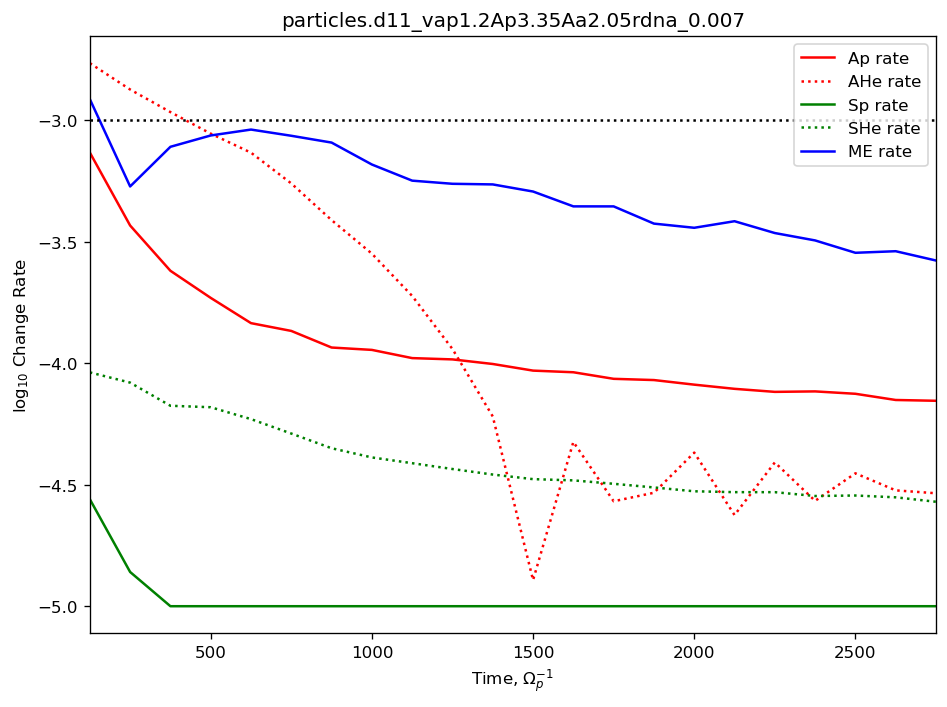

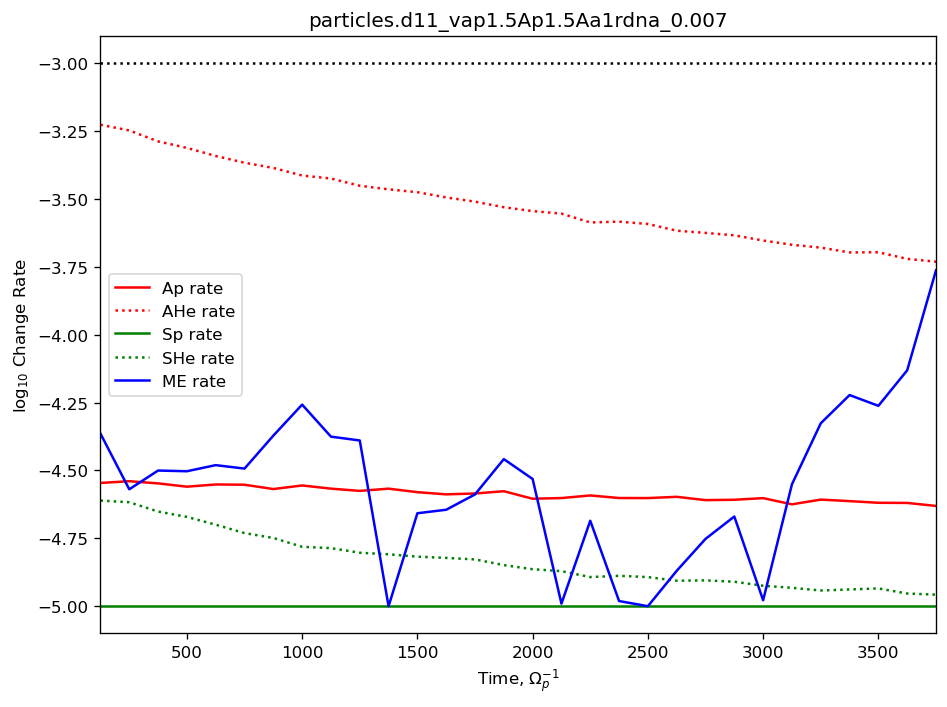

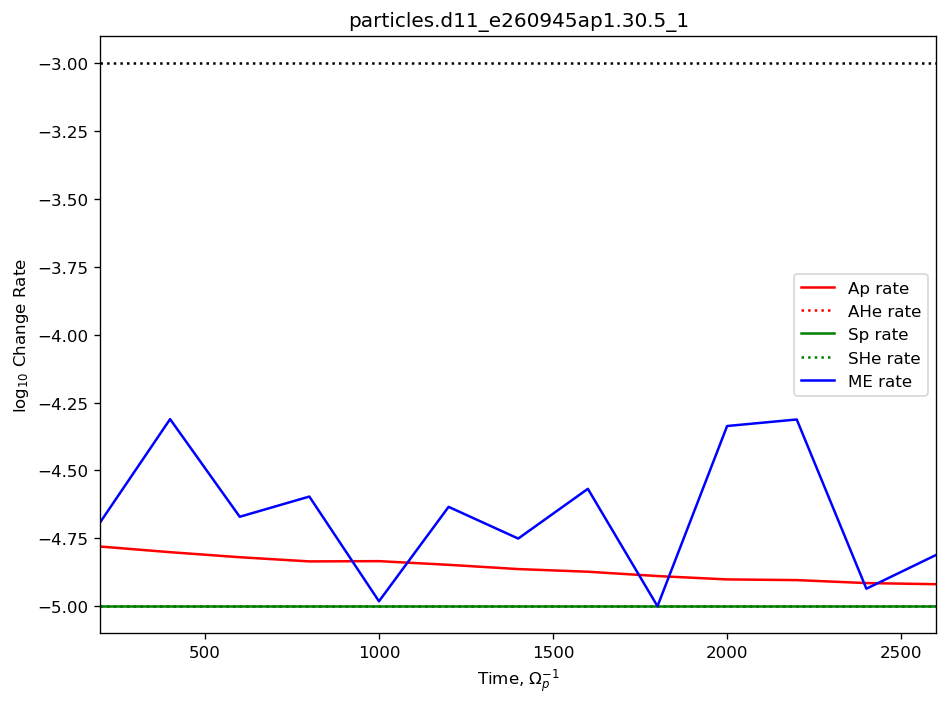

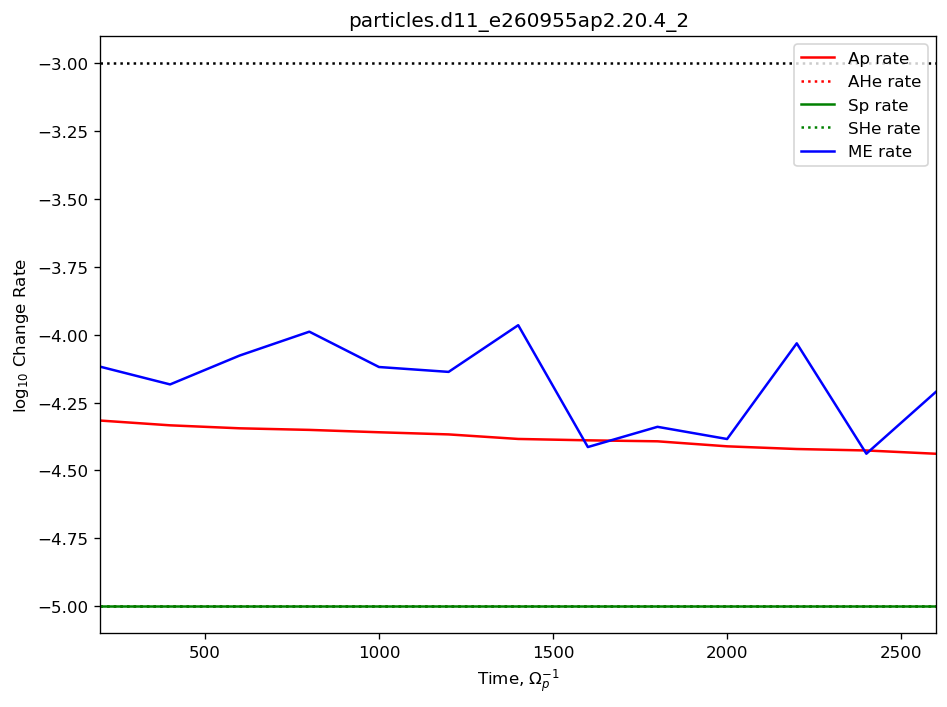

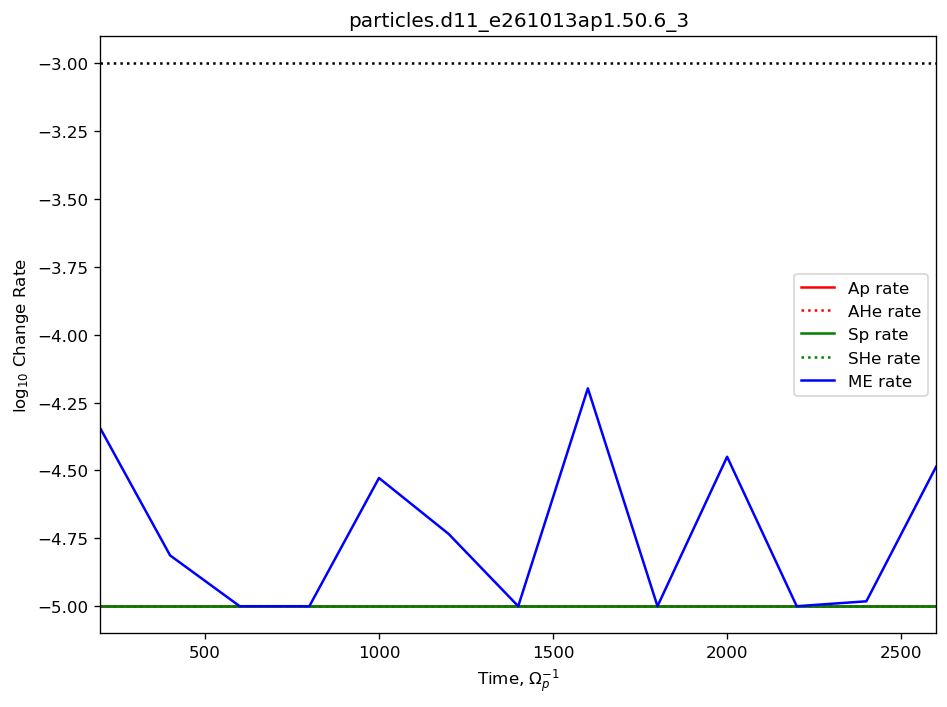

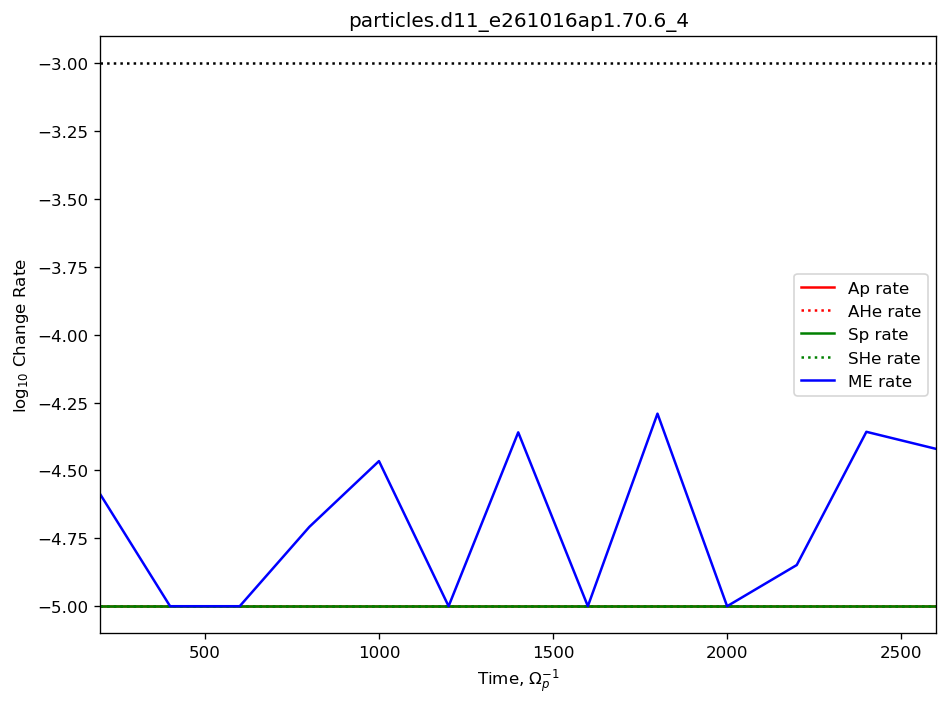

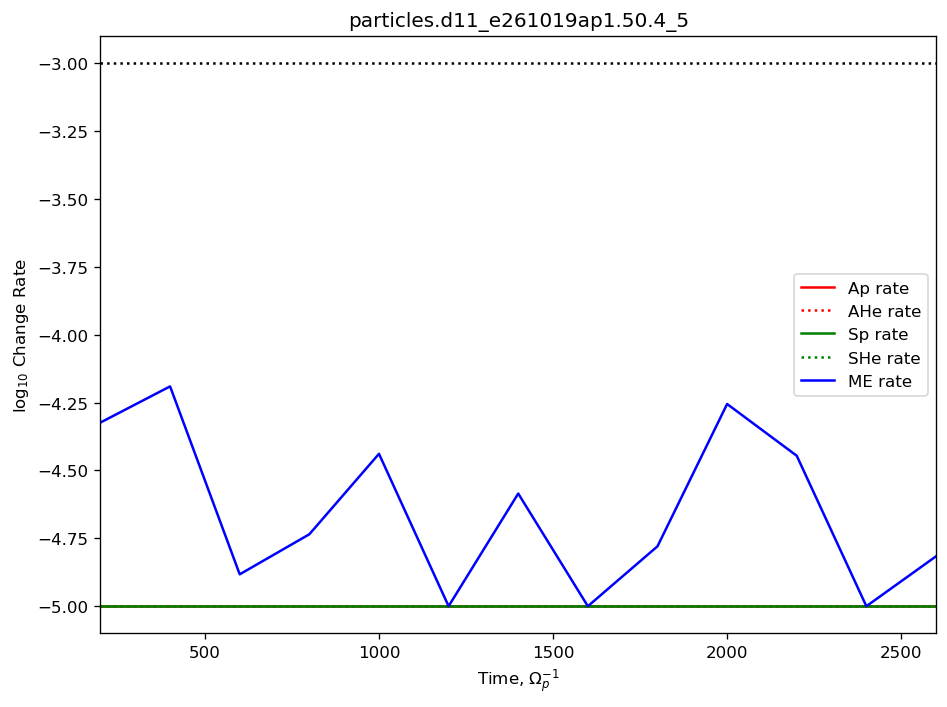

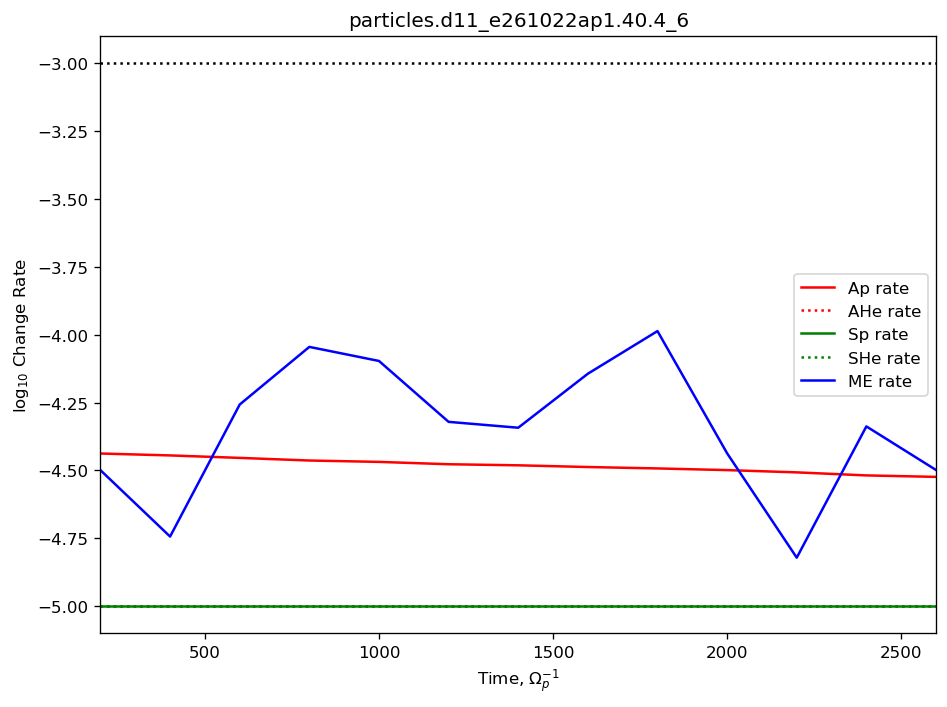

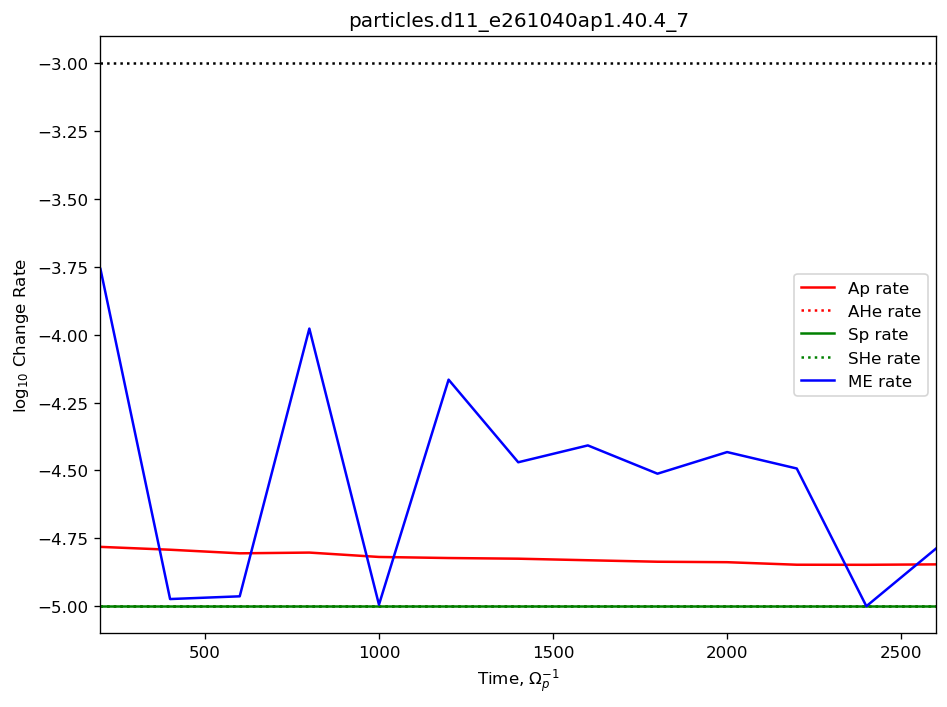

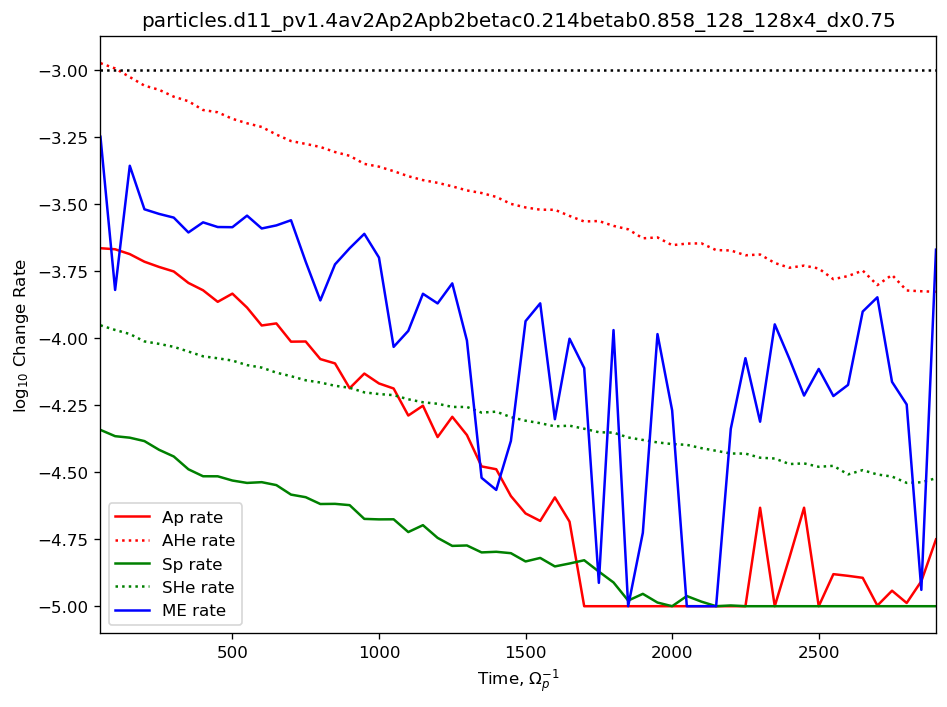

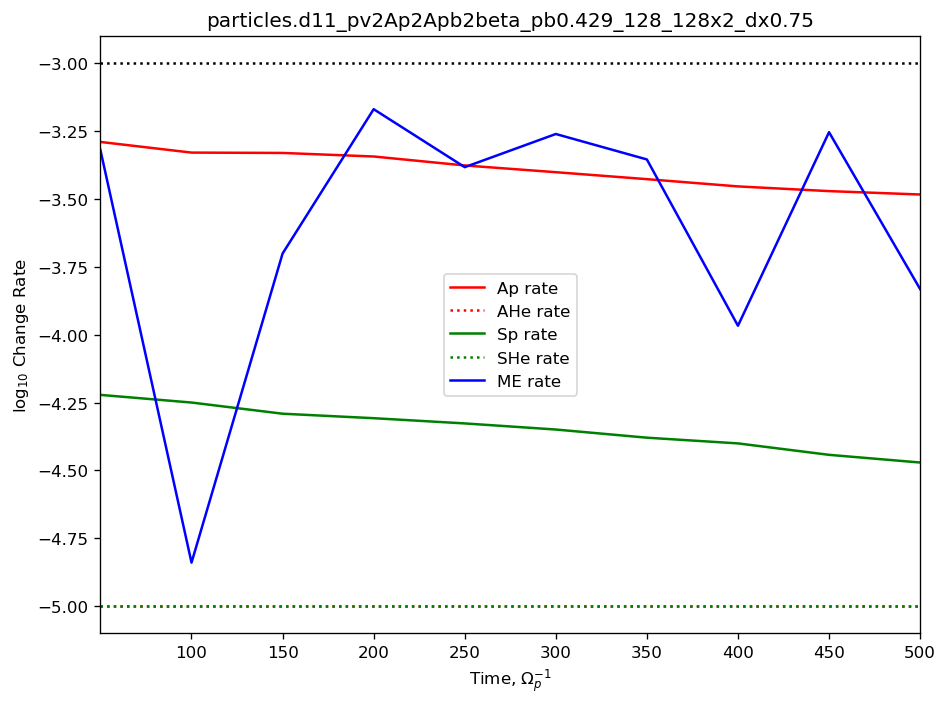

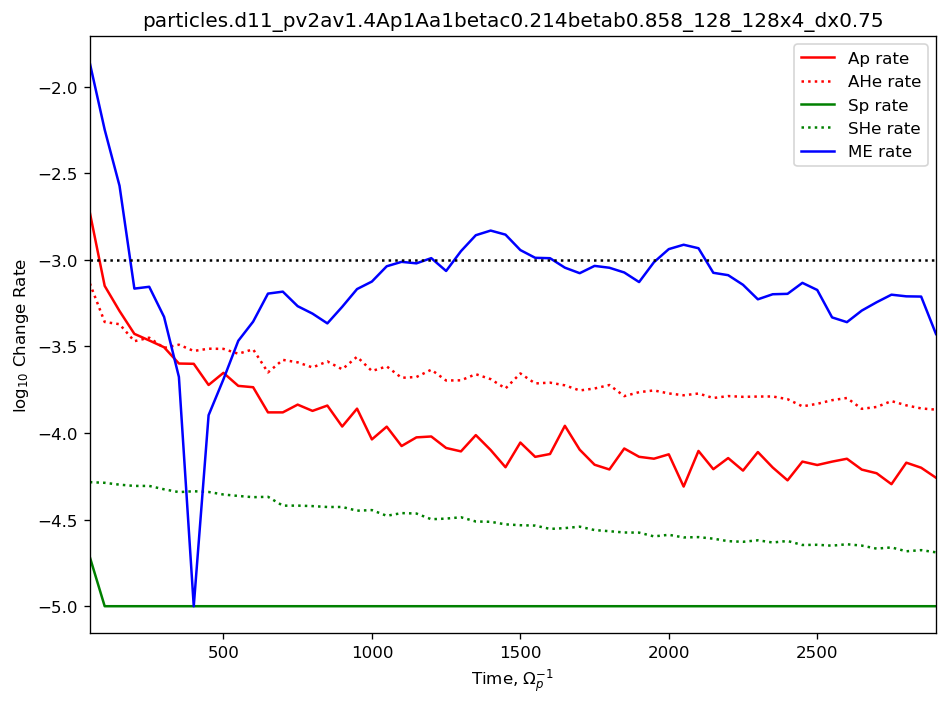

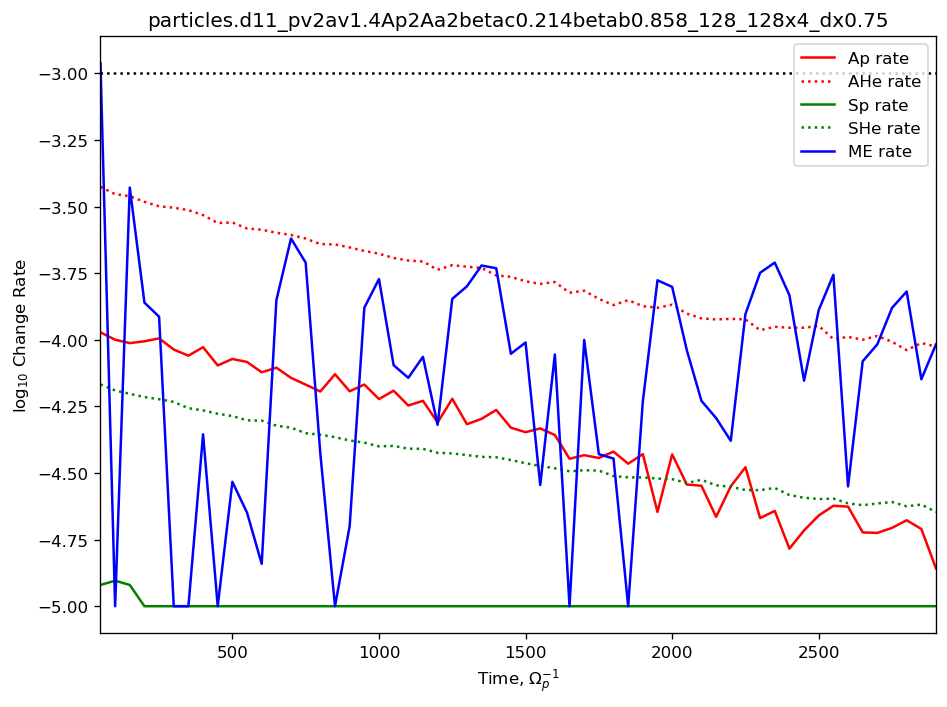

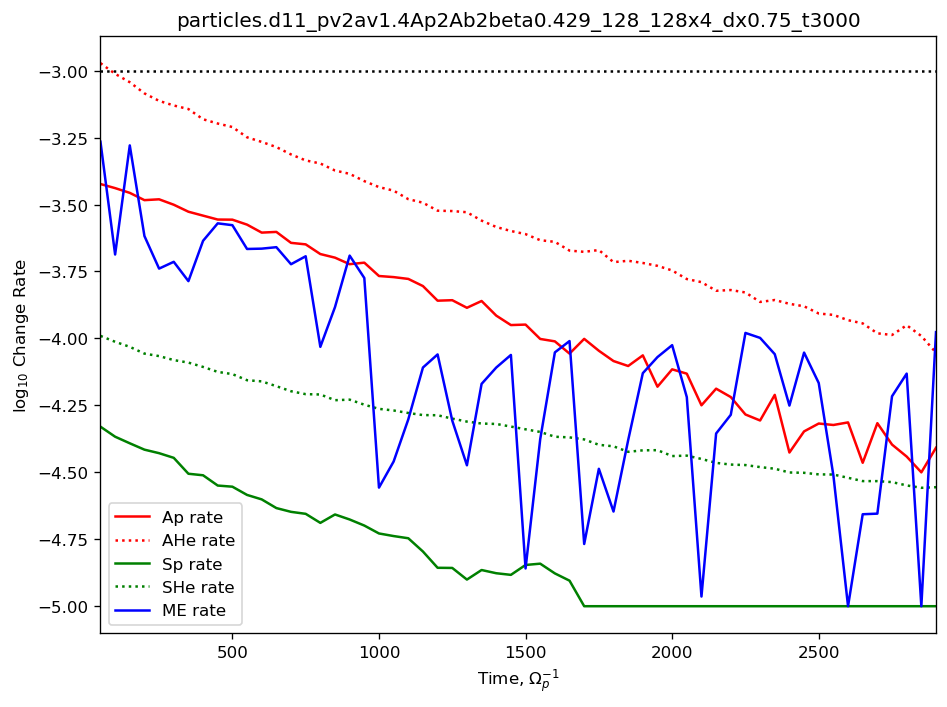

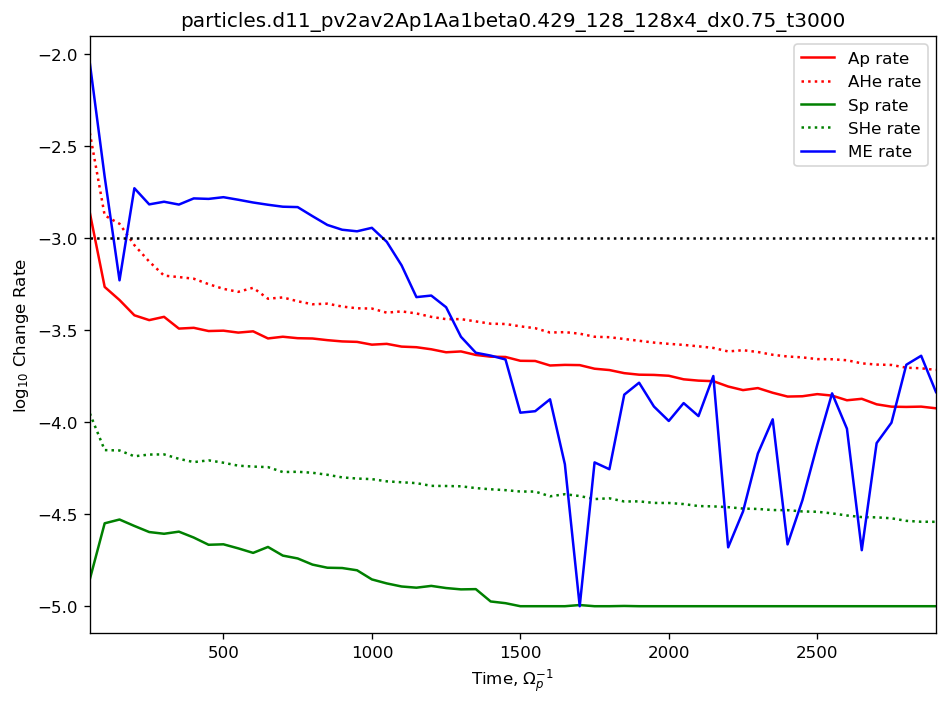

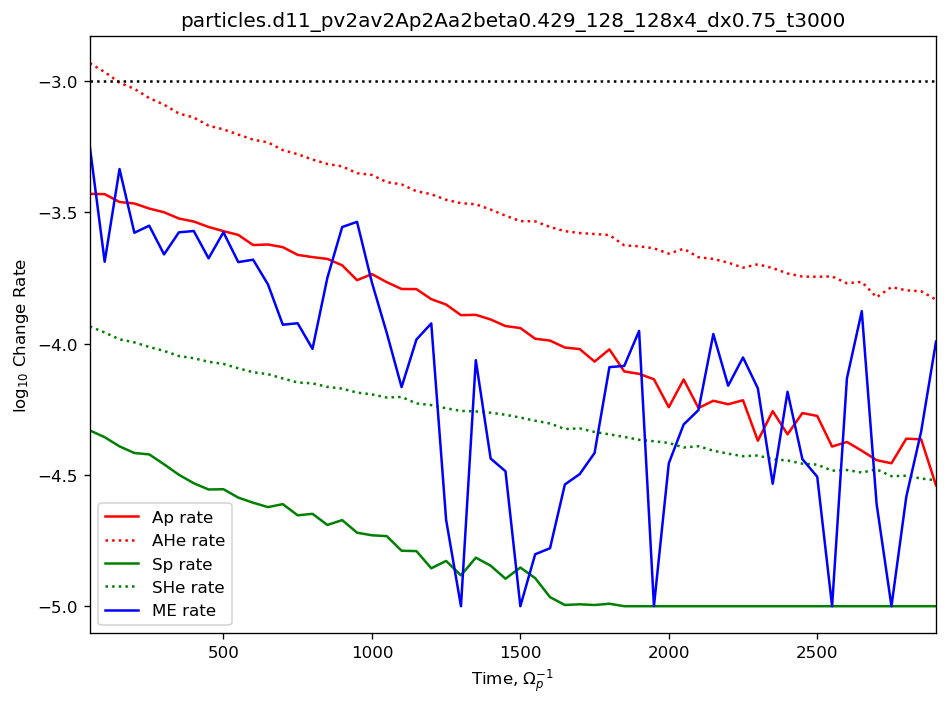

In [15]:
def visualize_changerates(times, an_p, an_he, me, en_p, en_he, simname):
    an_p = np.abs(an_p)
    an_he = np.abs(an_he)
    me = np.abs(me)
    en_p = np.abs(en_p)
    en_he = np.abs(en_he)
    an_p[np.where(an_p < 1e-5)] = 1e-5
    an_he[np.where(an_he < 1e-5)] = 1e-5
    me[np.where(me < 1e-5)] = 1e-5
    en_p[np.where(en_p < 1e-5)] = 1e-5
    en_he[np.where(en_he < 1e-5)] = 1e-5
    im, ax = plt.subplots(1, 1, figsize = (8, 6), dpi=120)
    ax.plot(times, np.log10(an_p), , label='Ap rate', color='red')
    ax.plot(times, np.log10(an_he), label='AHe rate', color='red', linestyle=':')
    ax.plot(times, np.log10(en_p), label='Sp rate', color='green')
    ax.plot(times, np.log10(en_he), label='SHe rate', color='green', linestyle=':')
    ax.plot(times, np.log10(me), label='ME rate', color='blue')
    ax.plot([times[0], times[-1]], [-3,-3], color='black', linestyle=':')
    ax.set(xlim=[times[0], times[-1]], xlabel = r'Time, $\Omega{}_{p}^{-1}$', ylabel=r'log$_{10}$ Change Rate')
    ax.set(title=simname)
    ax.legend()
    plt.tight_layout()
    plt.show()
    return

for i in range (0, len(istart_all), 1):
    istart = istart_all[i]
    iend = iend_all[i]
    times = timep_array_all[istart:iend+1]
    an_p = labels_allmoments_an_re_all[istart:iend+1,0]
    an_he = labels_allmoments_an_re_all[istart:iend+1,1]
    me = labels_allmoments_me_re_all[istart:iend+1]
    en_p = labels_entropy_re_all[istart:iend+1,0]
    en_he = labels_entropy_re_all[istart:iend+1,1]
    simname = simnames_all[istart]
    visualize_changerates(times, an_p, an_he, me, en_p, en_he, simname)

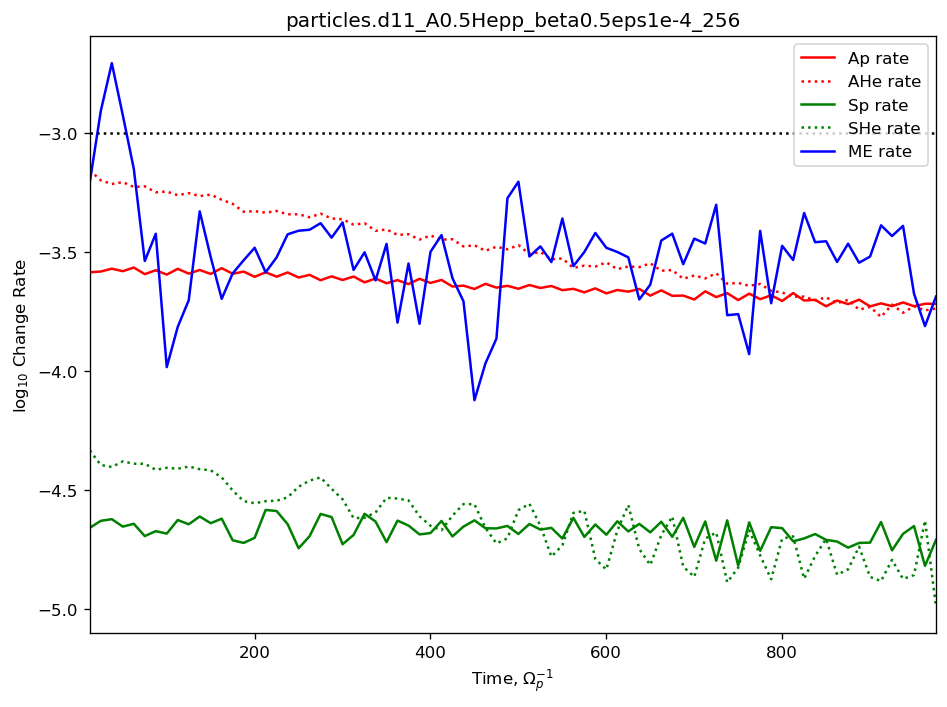

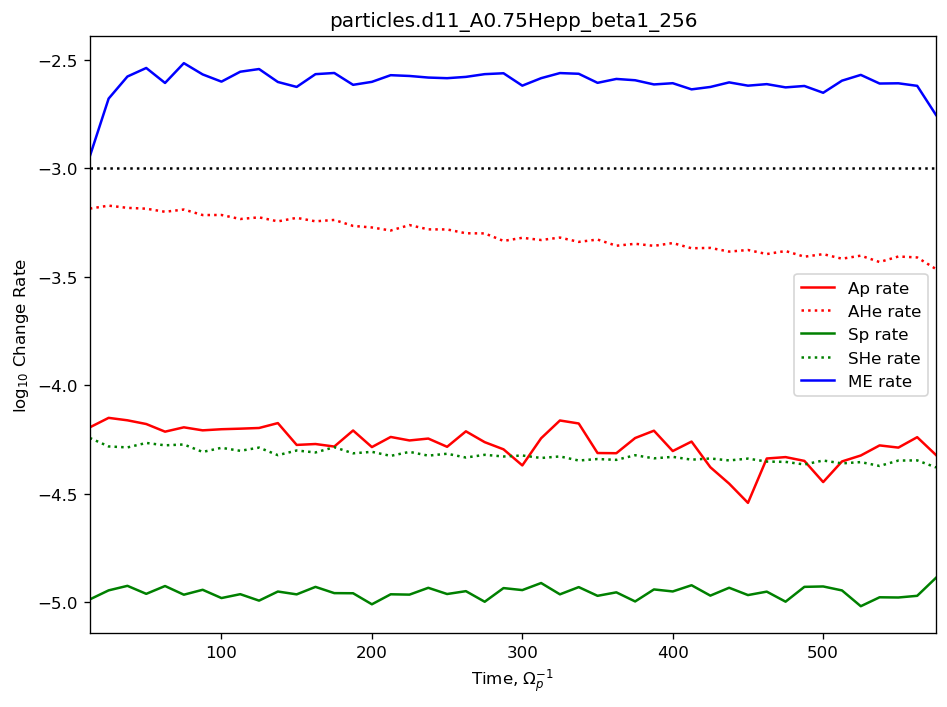

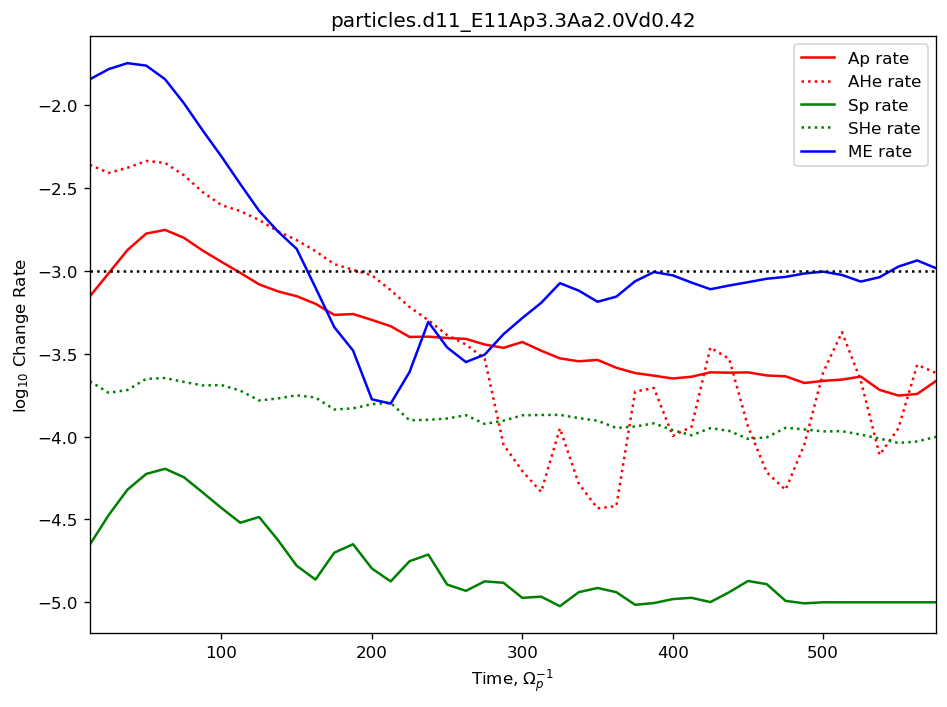

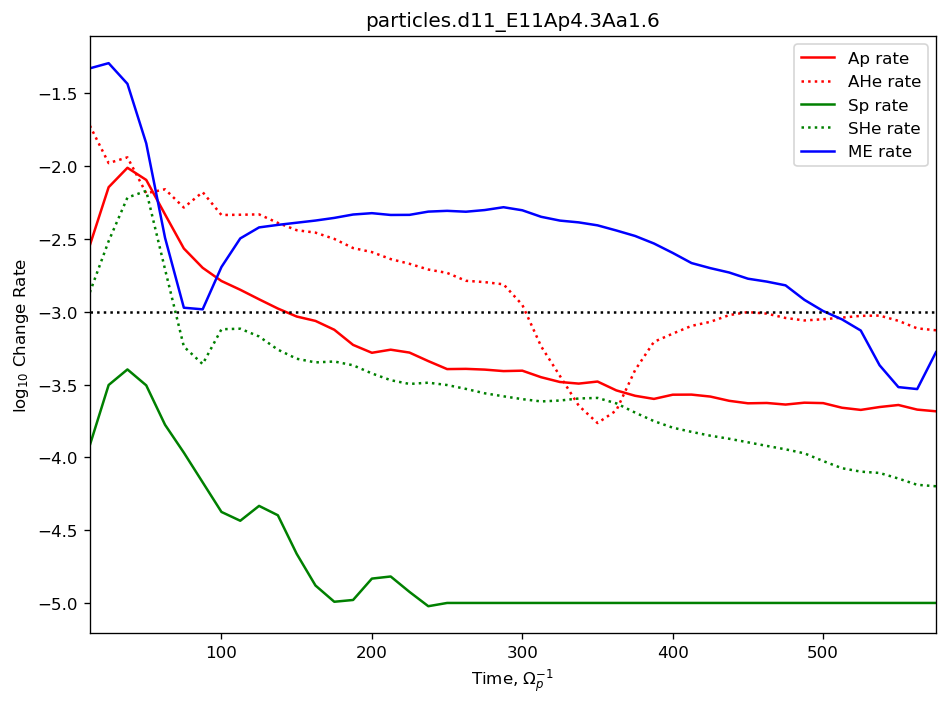

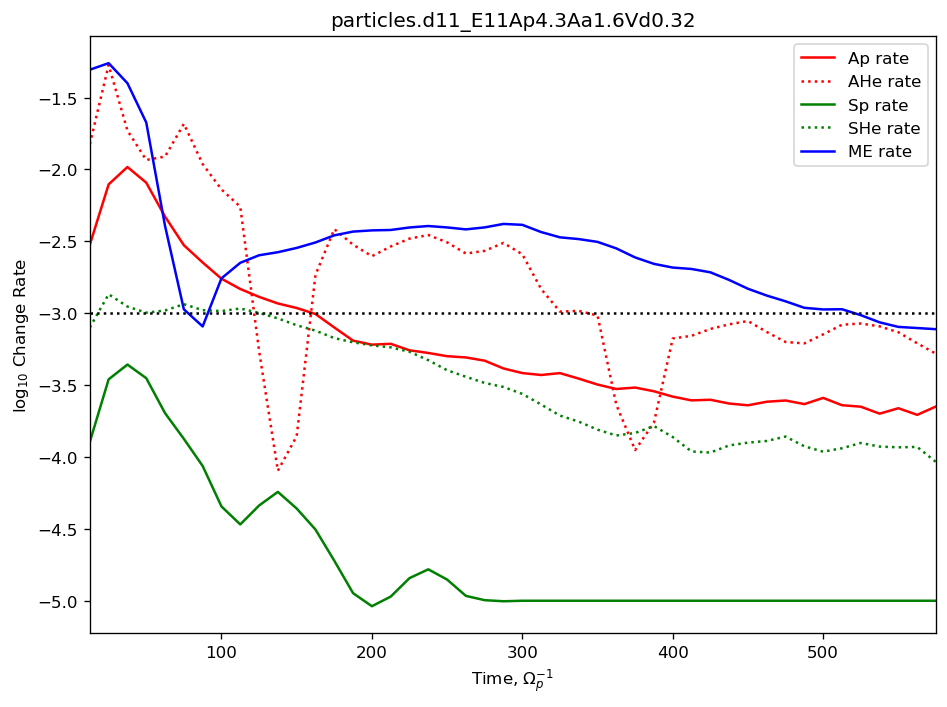

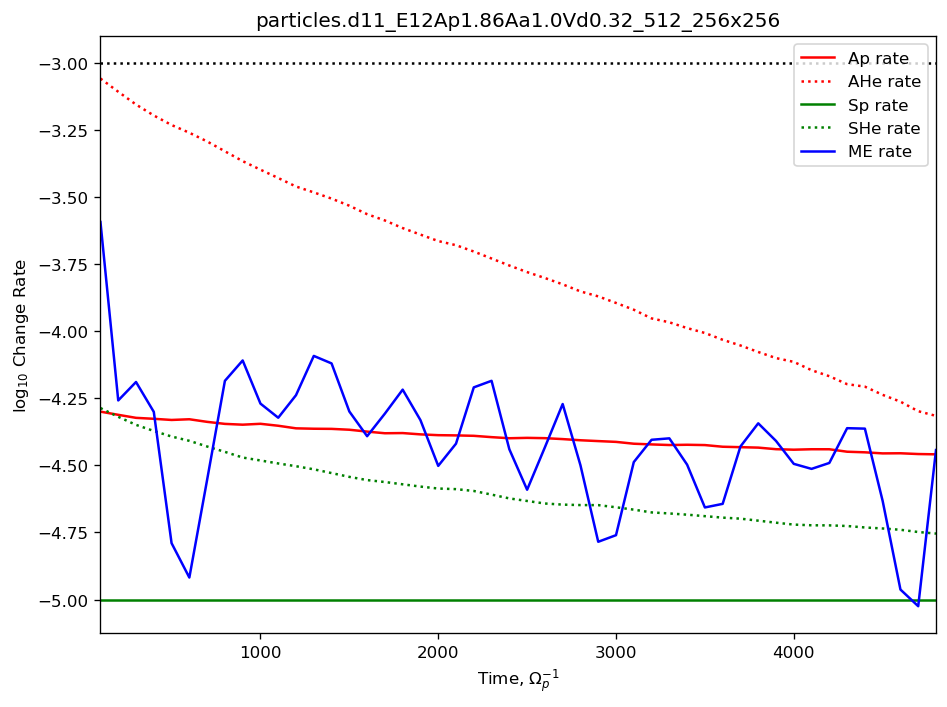

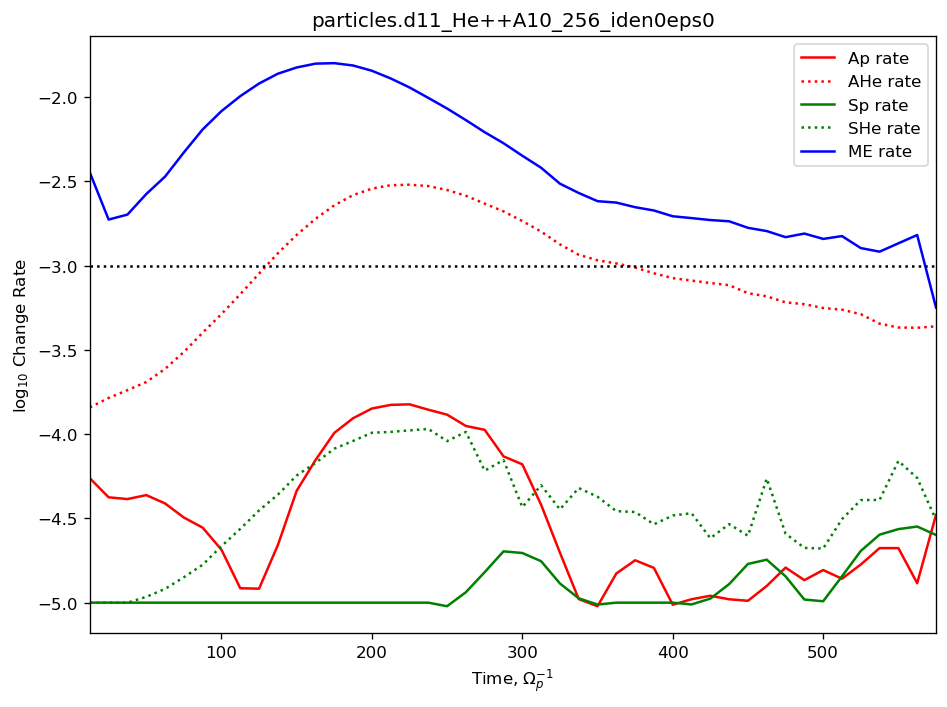

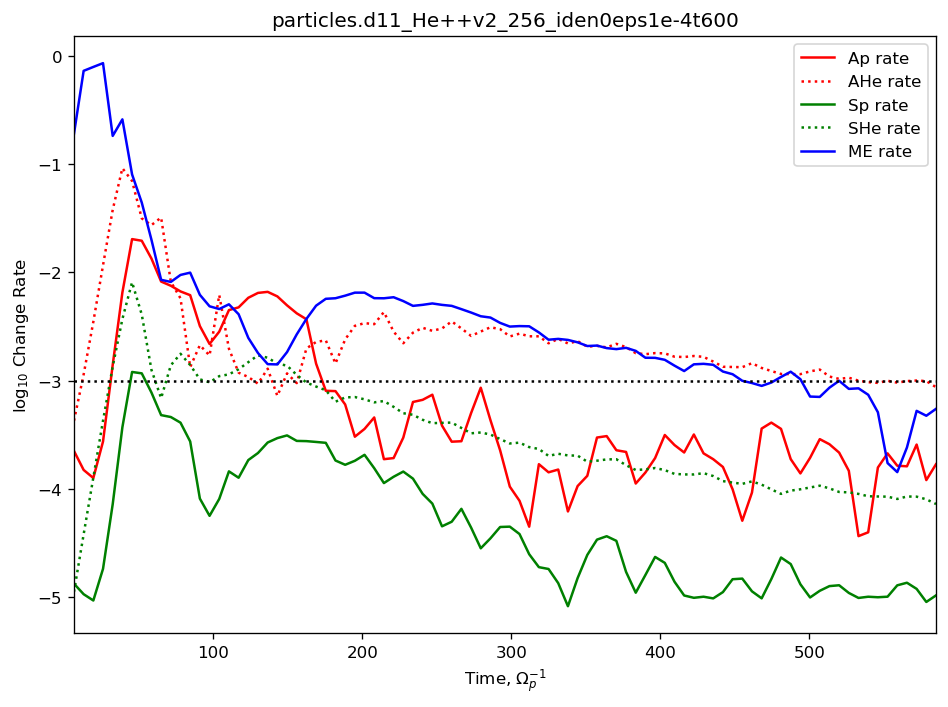

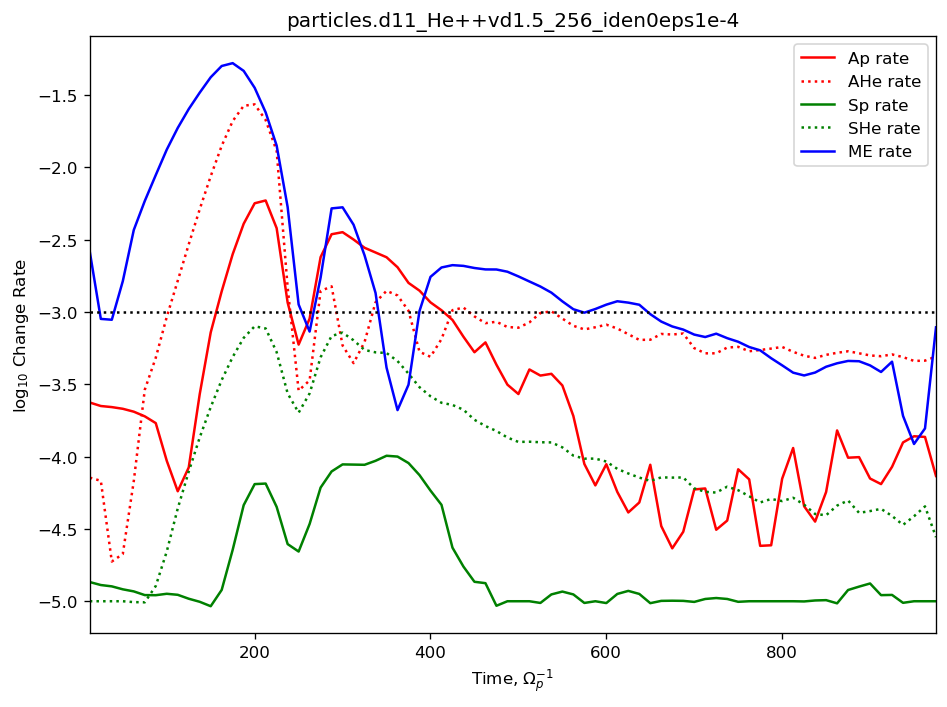

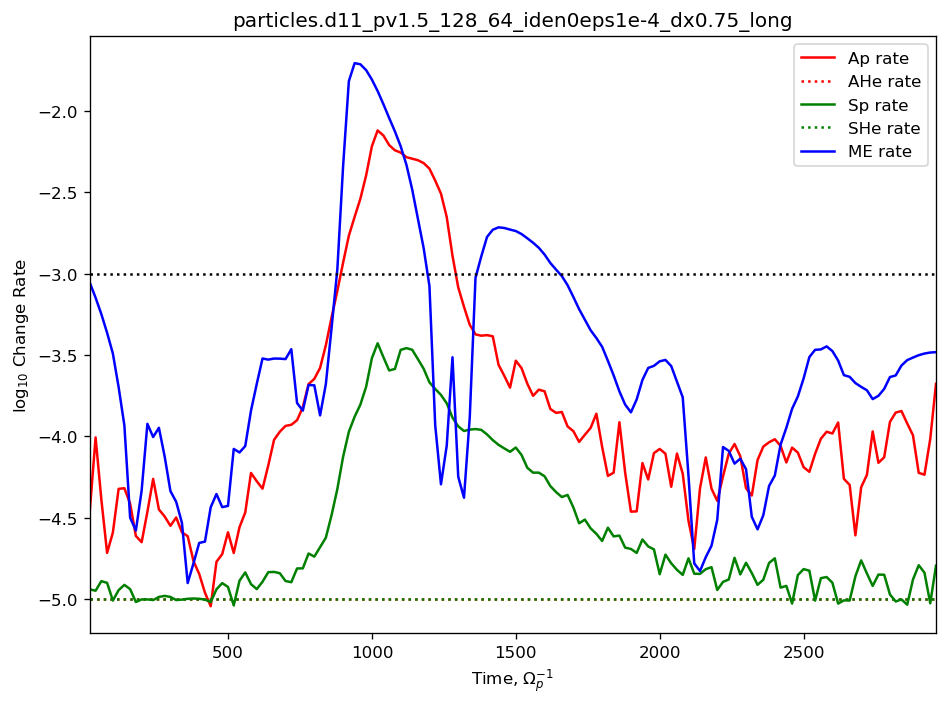

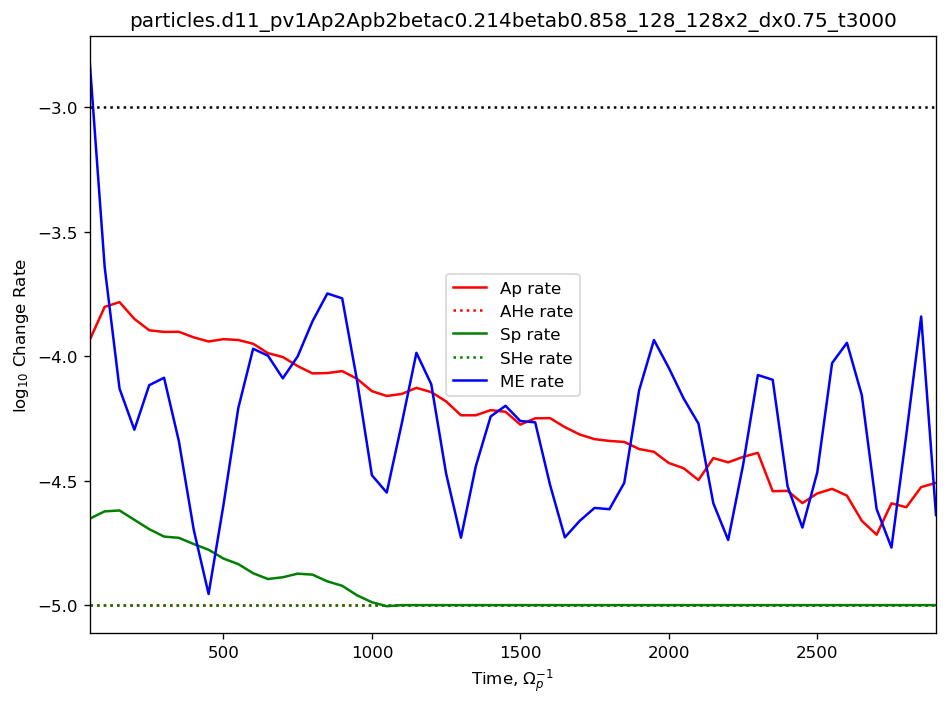

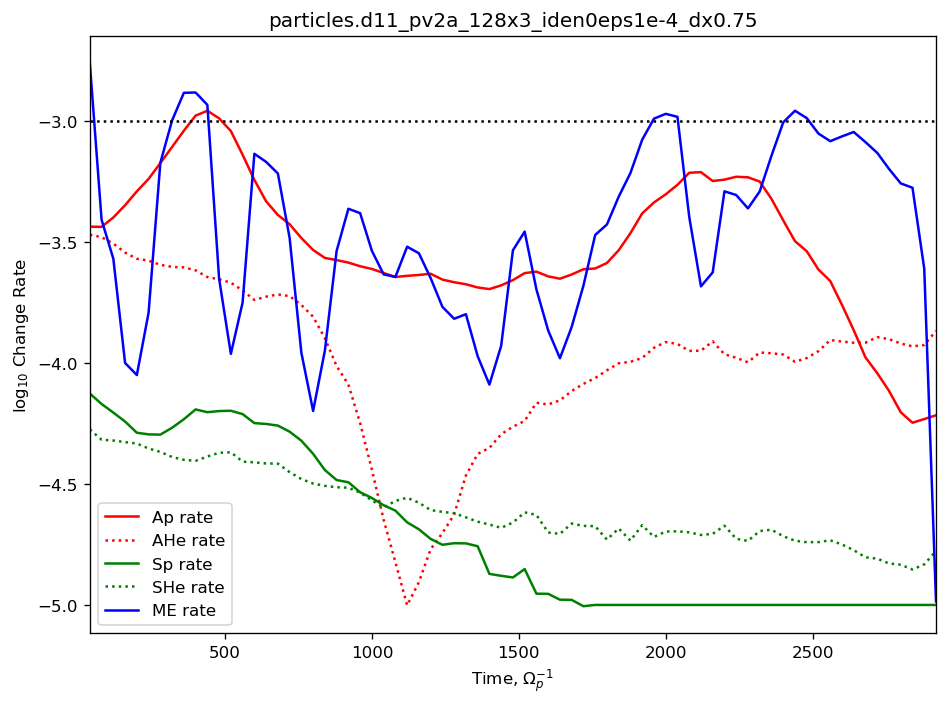

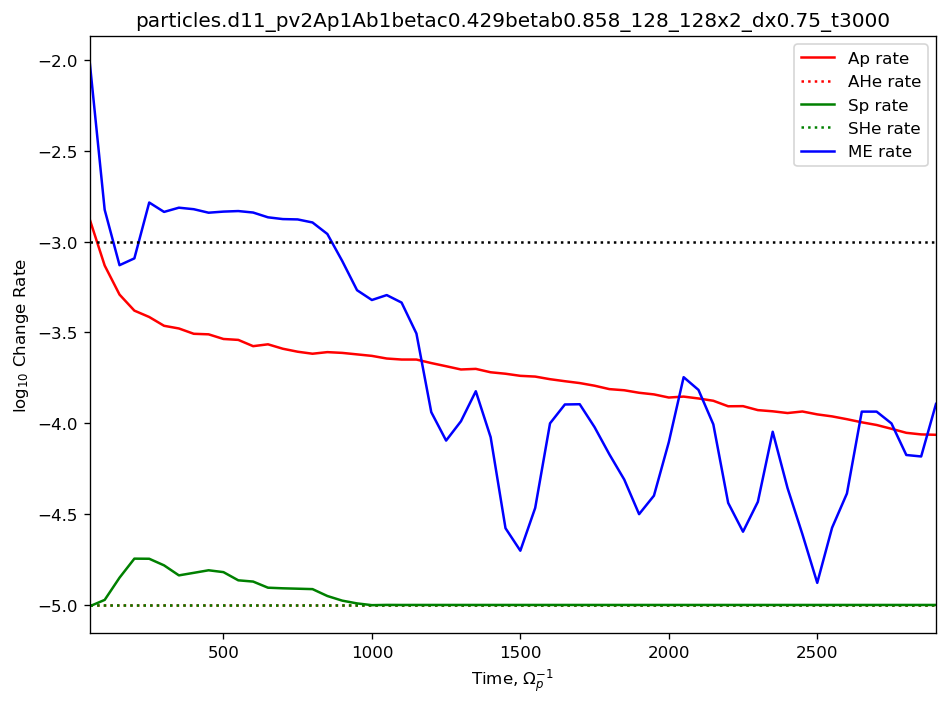

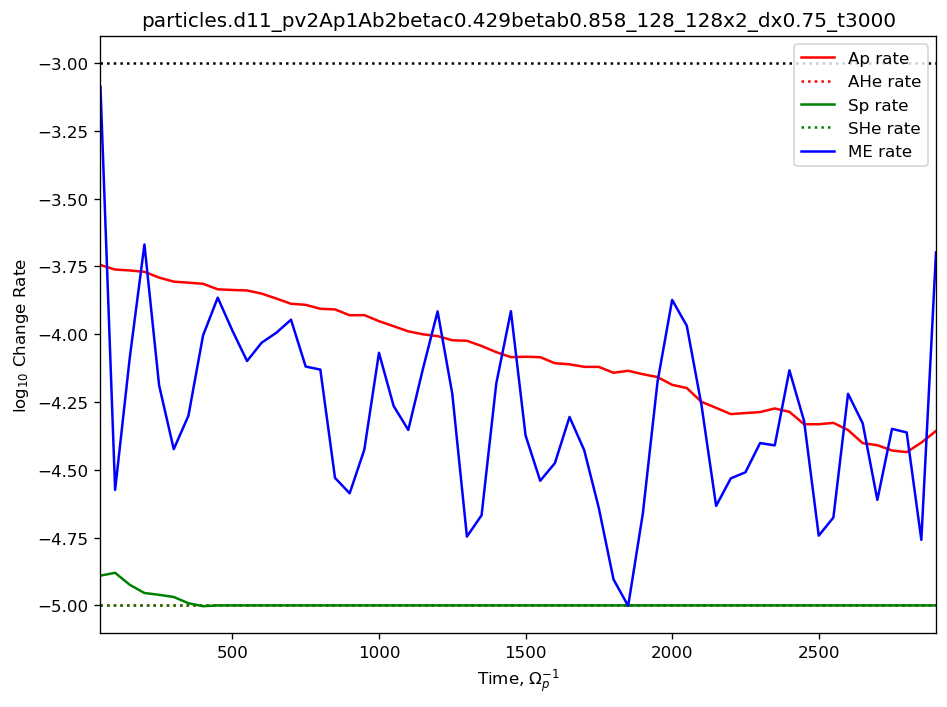

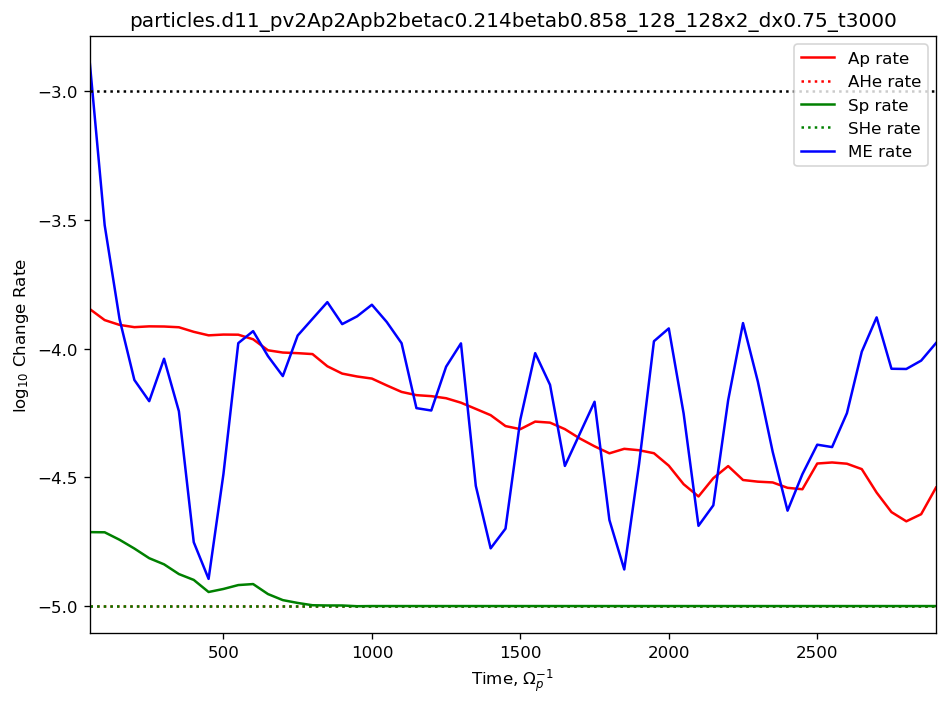

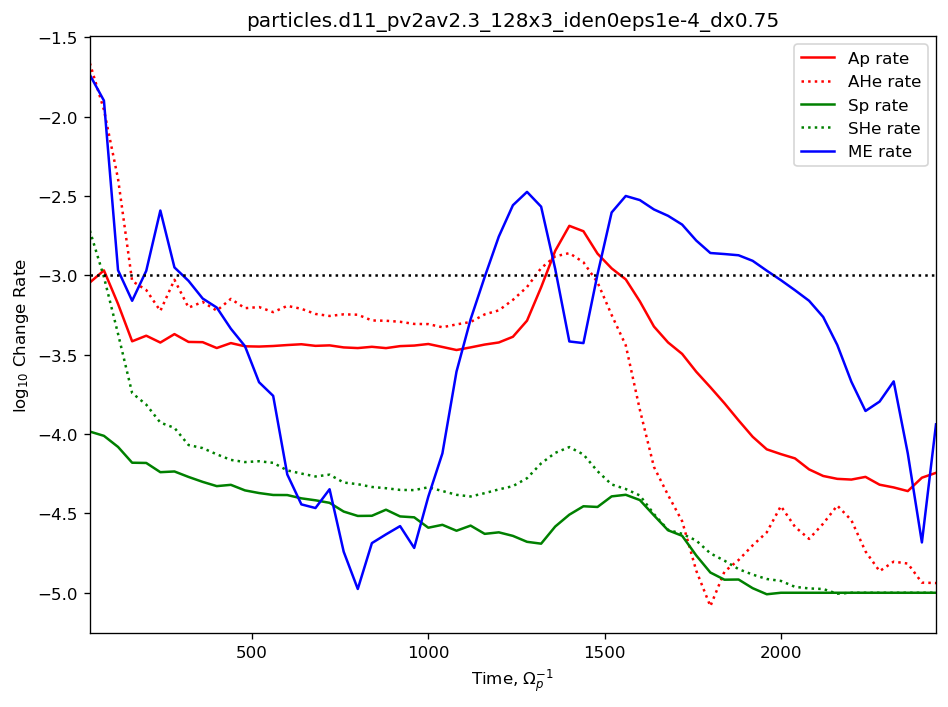

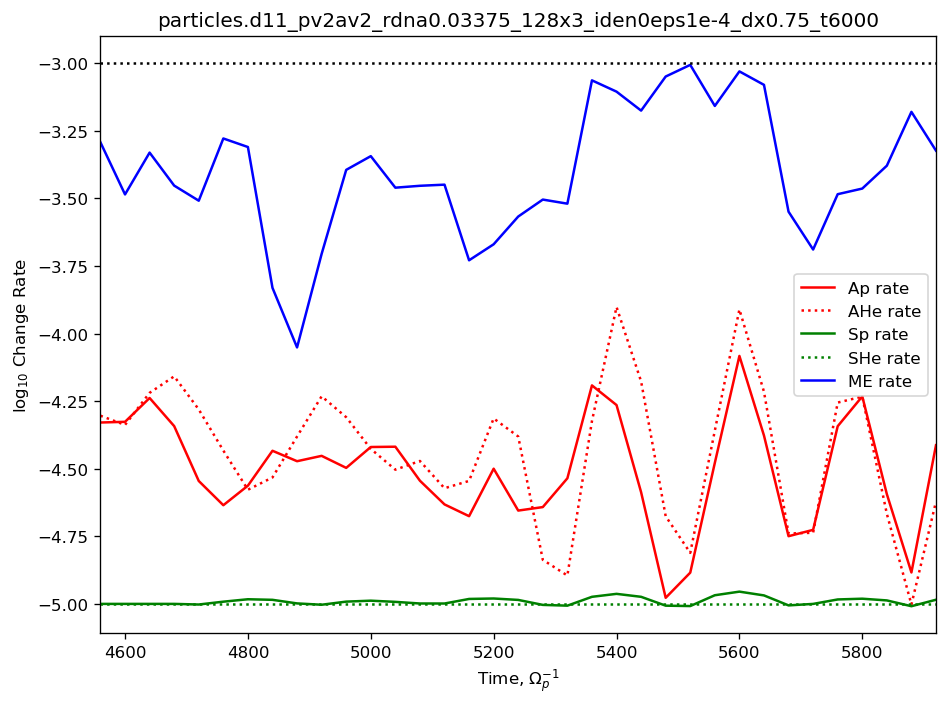

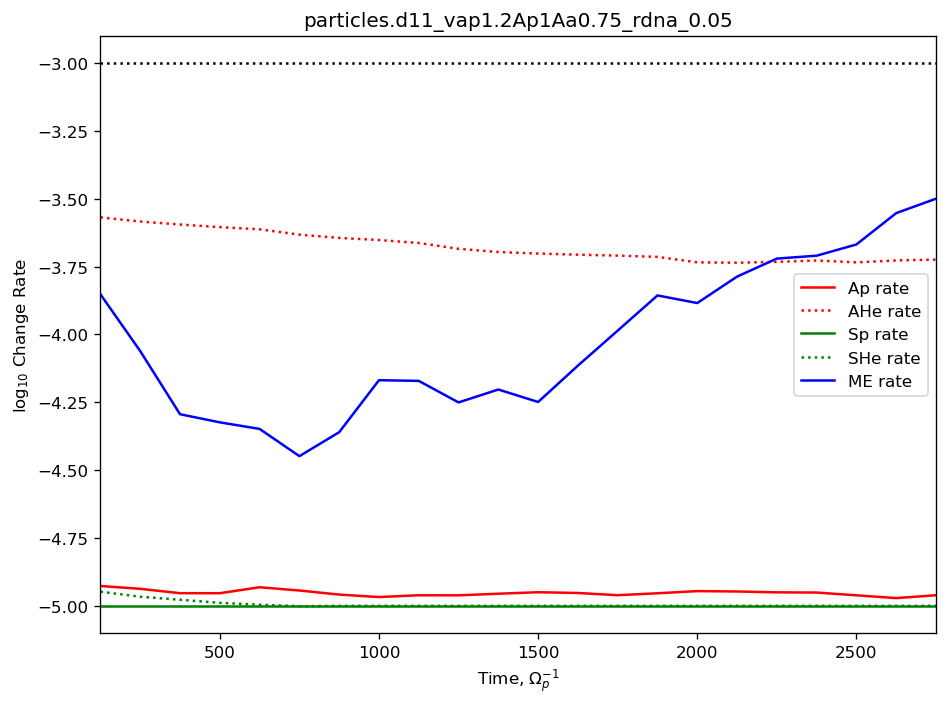

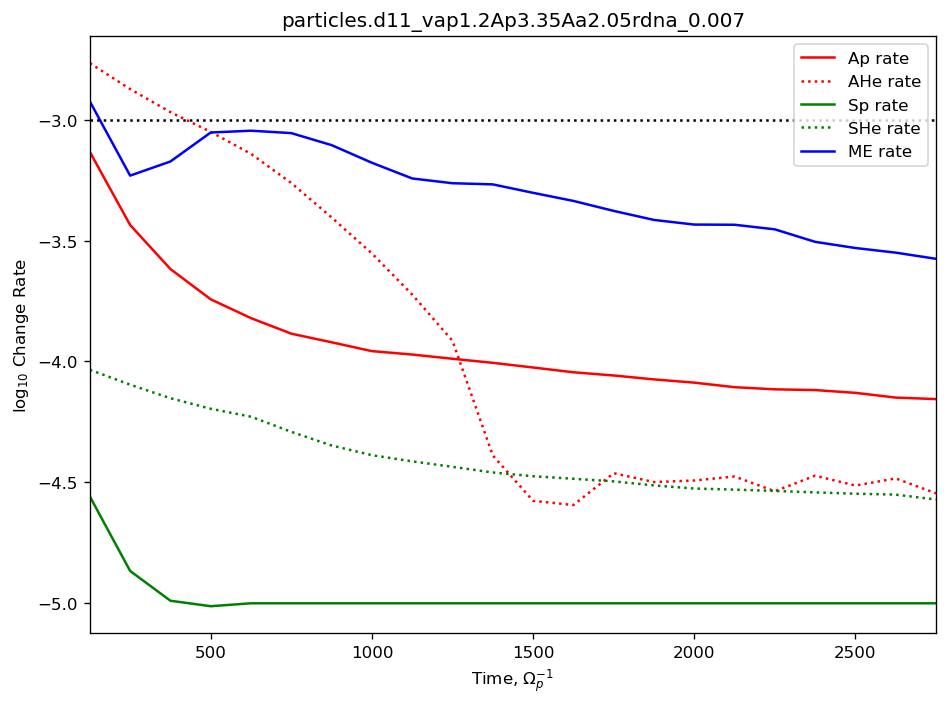

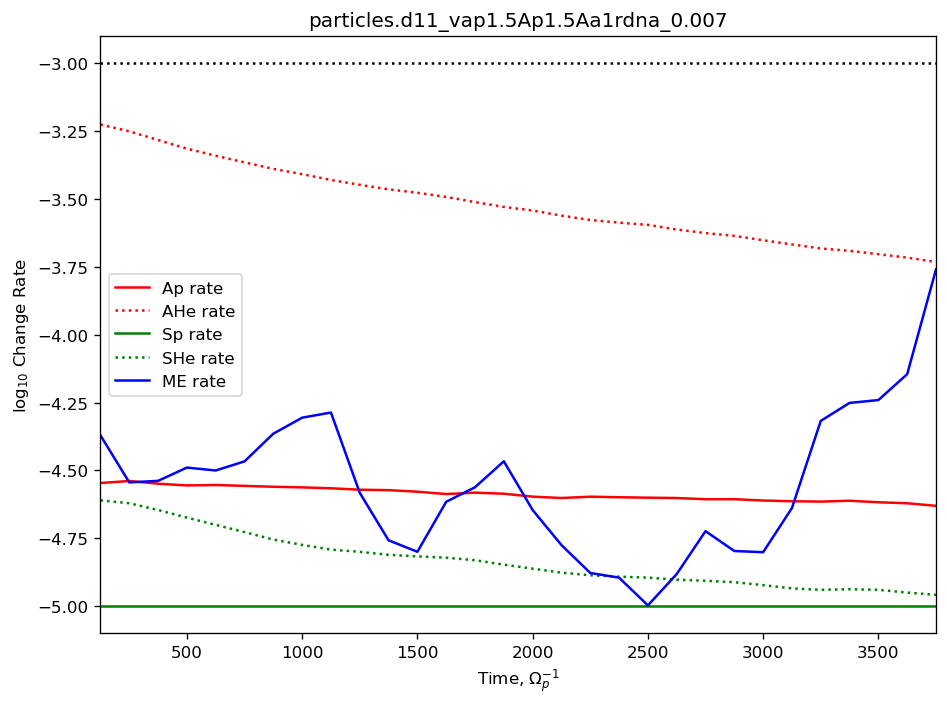

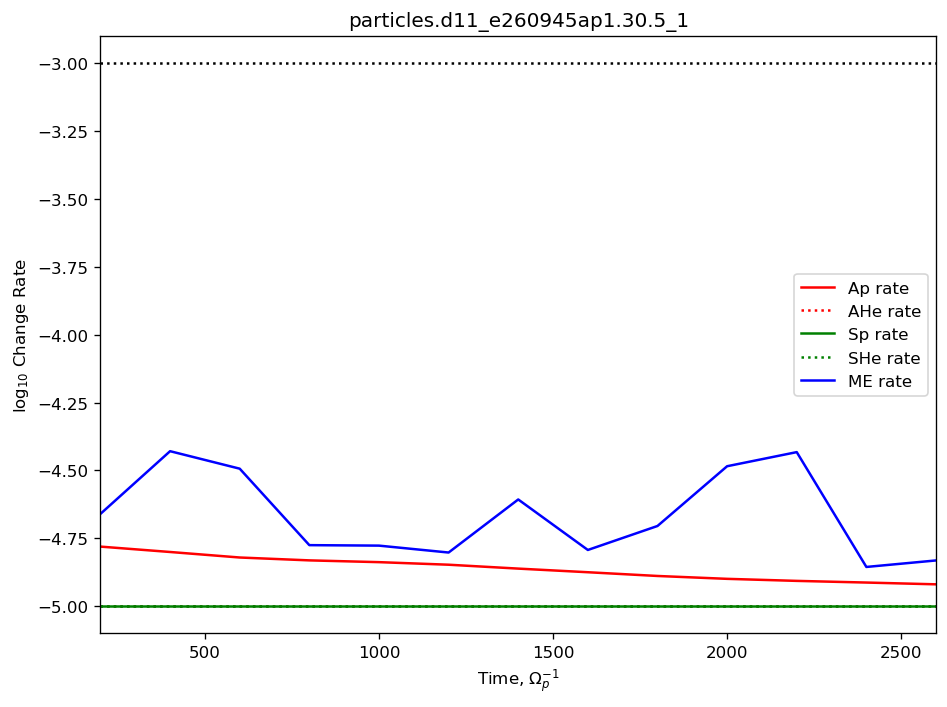

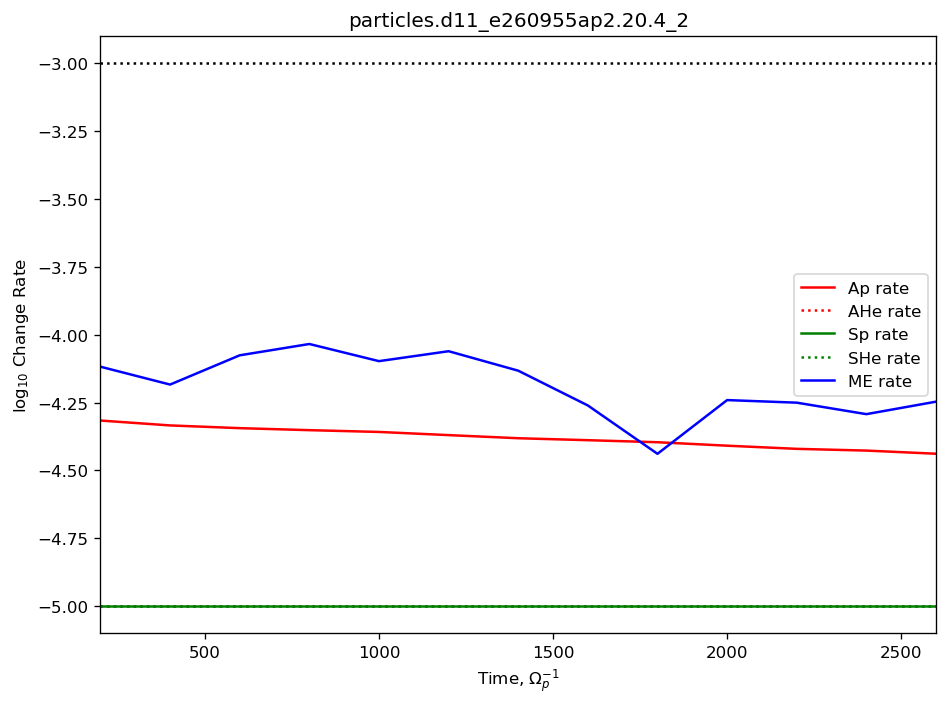

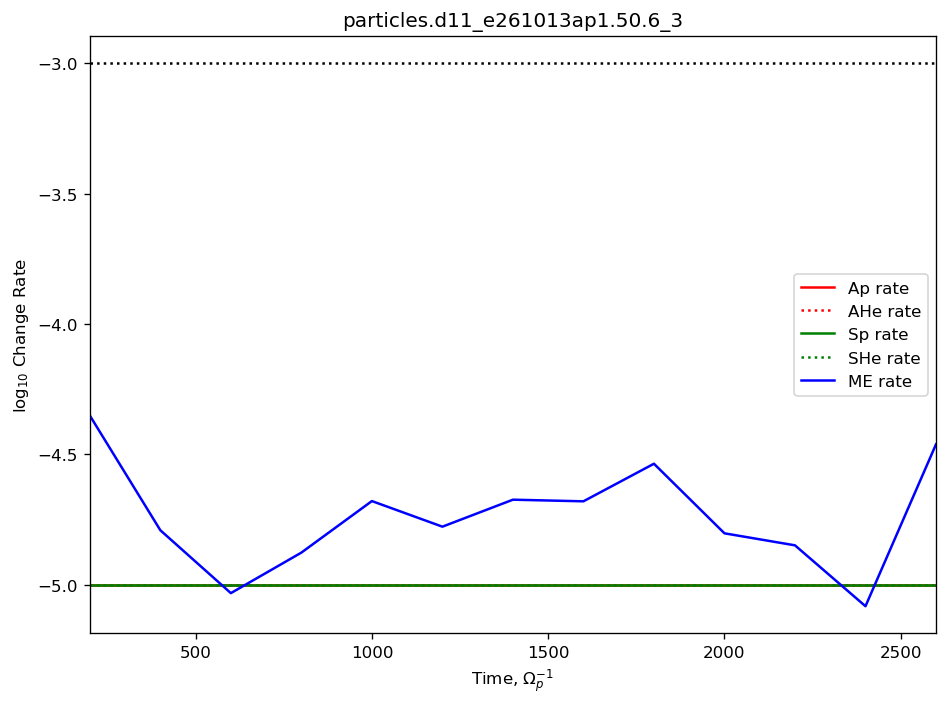

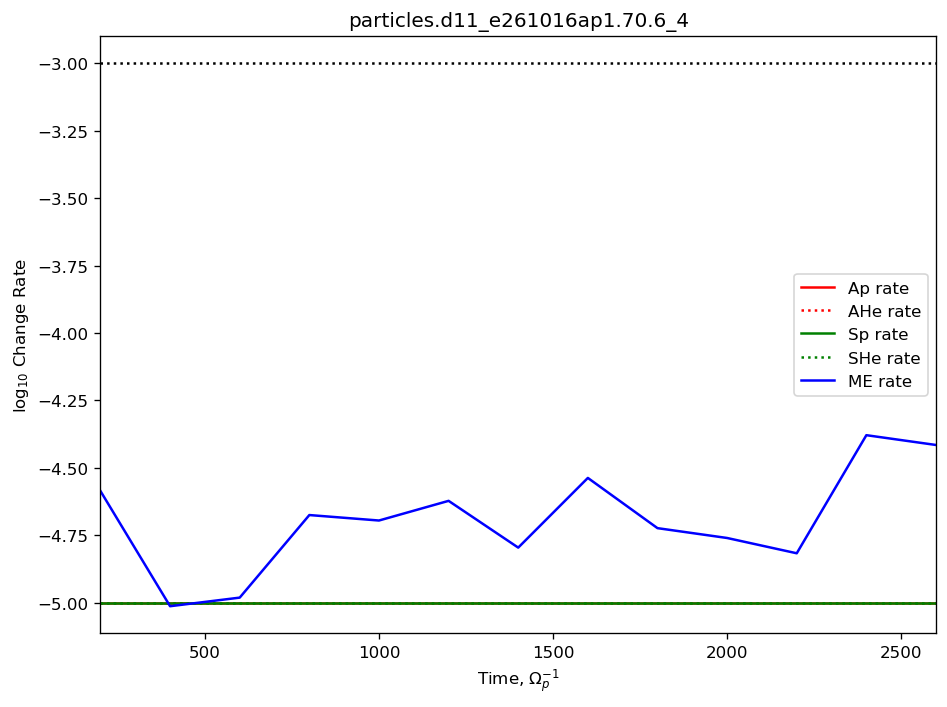

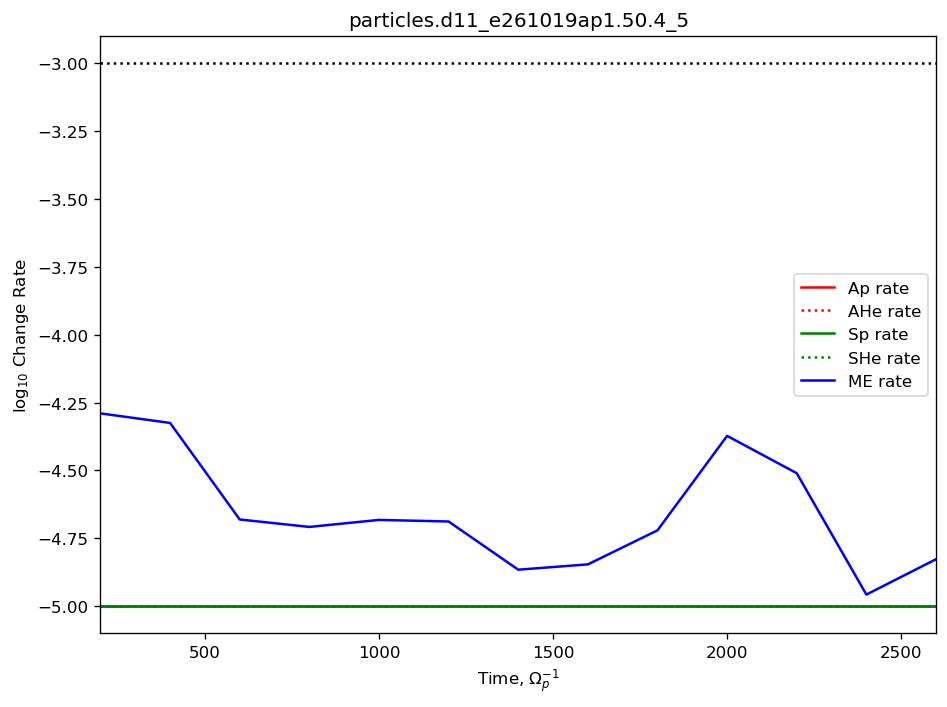

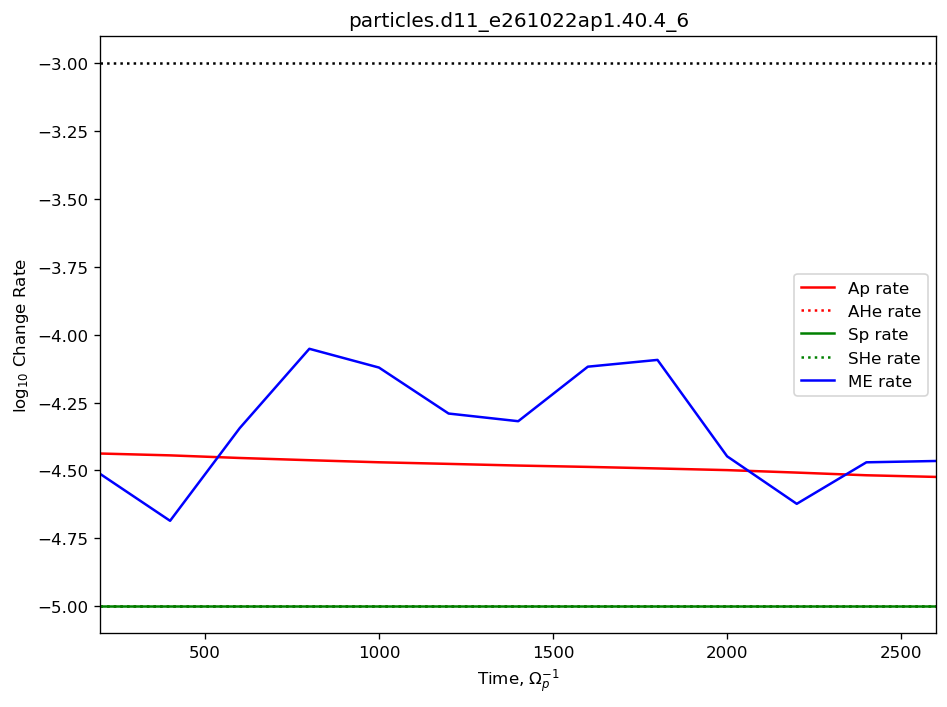

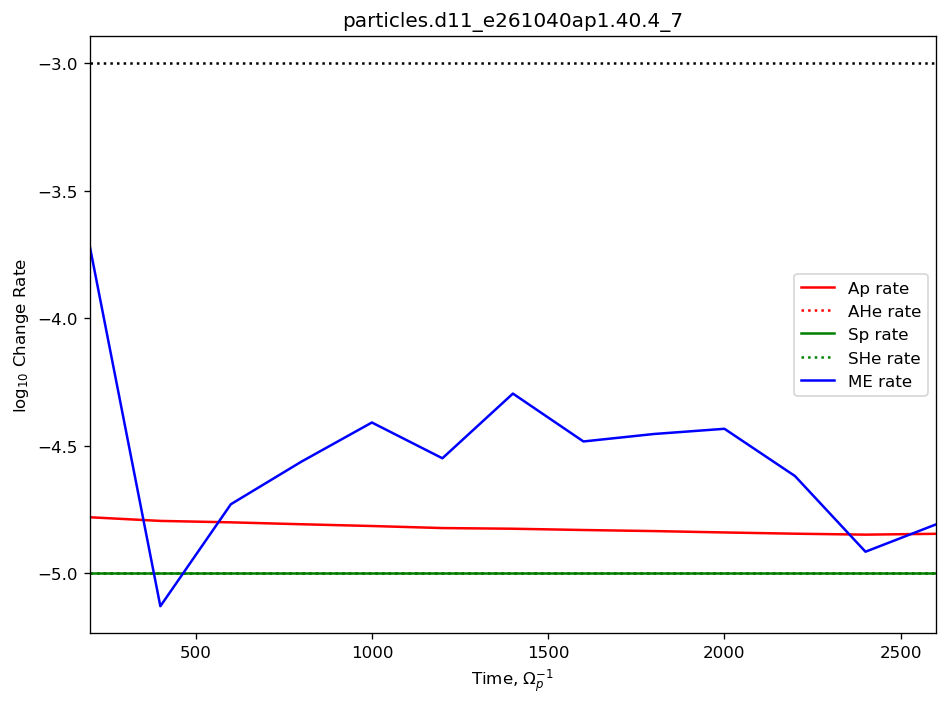

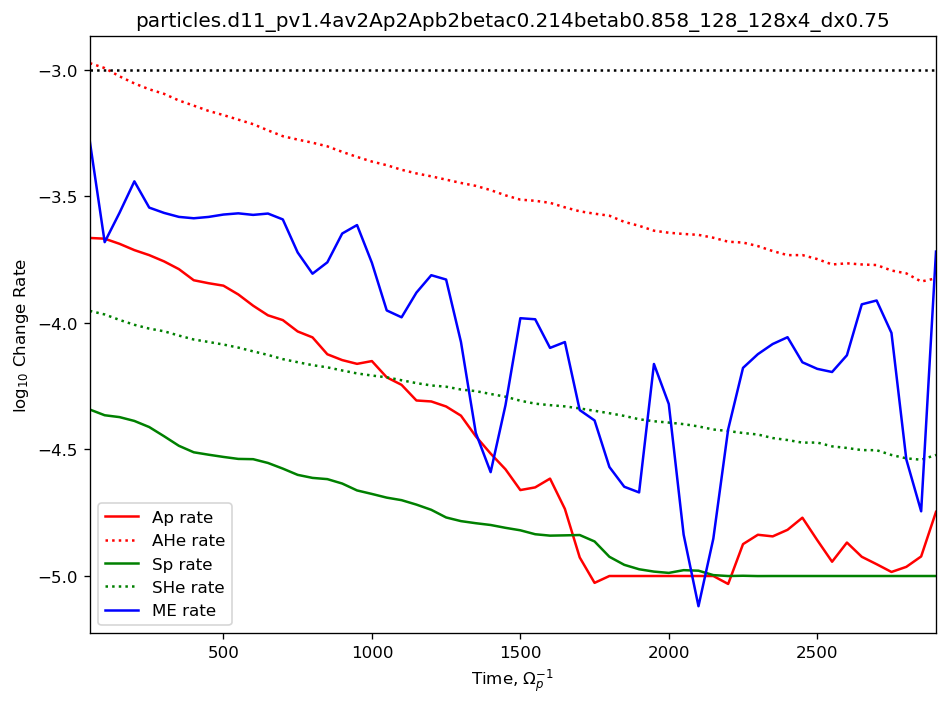

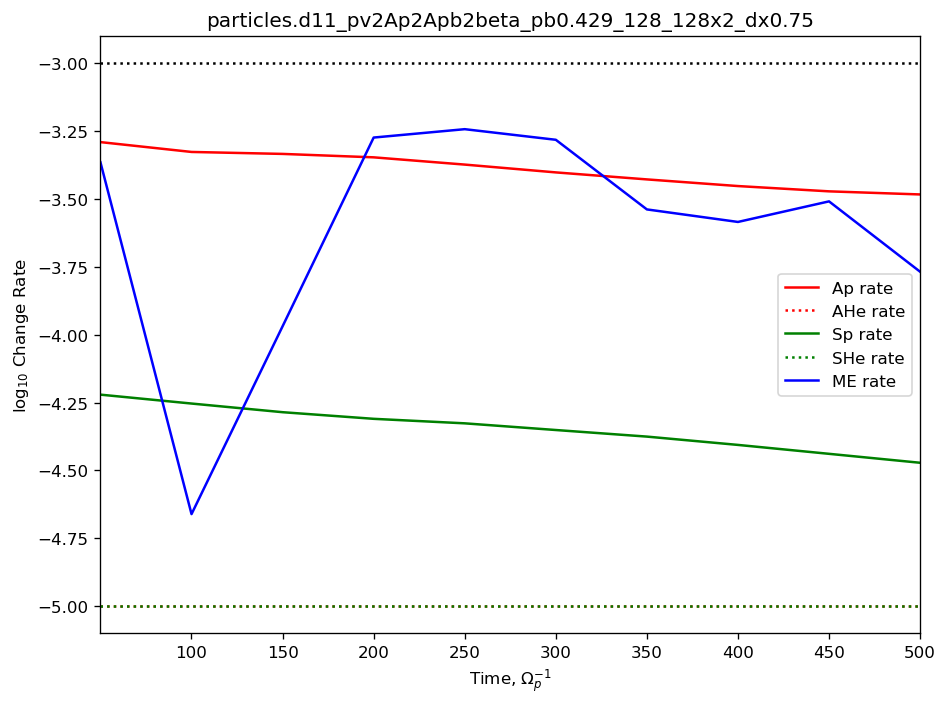

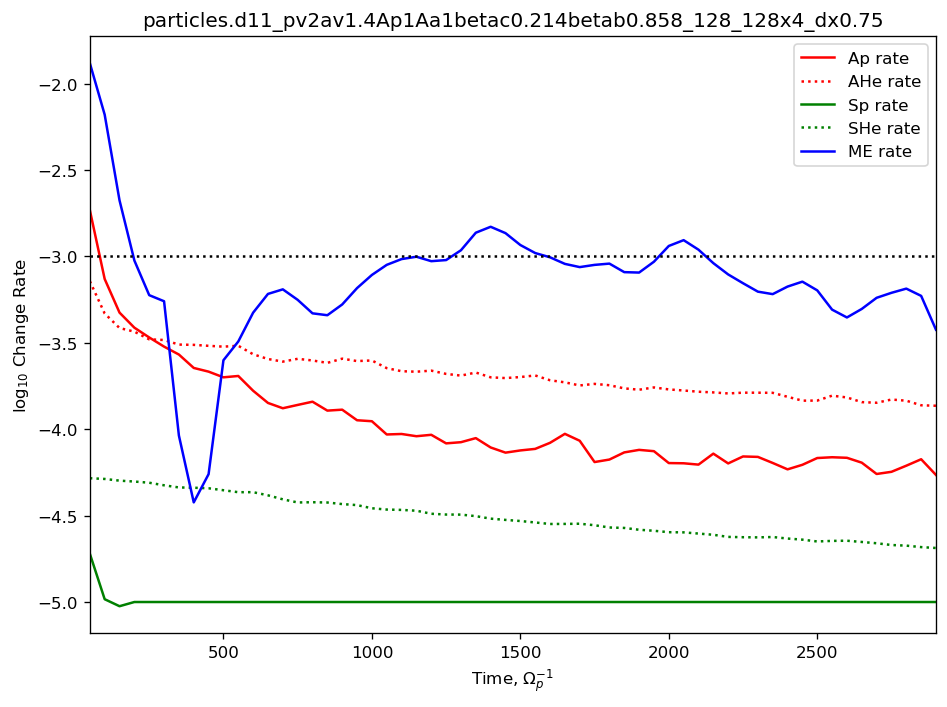

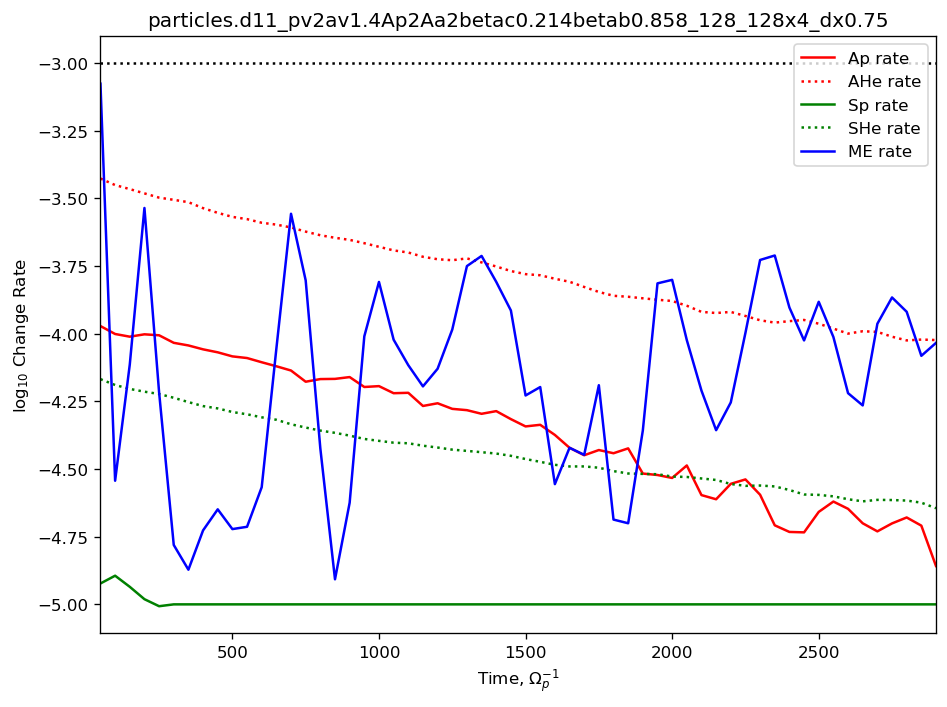

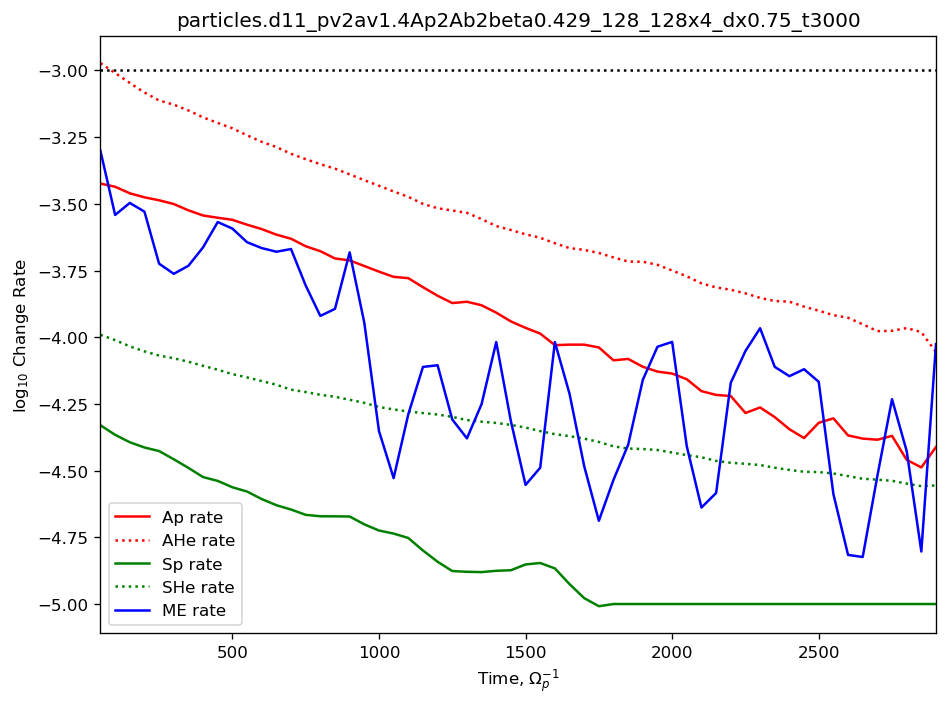

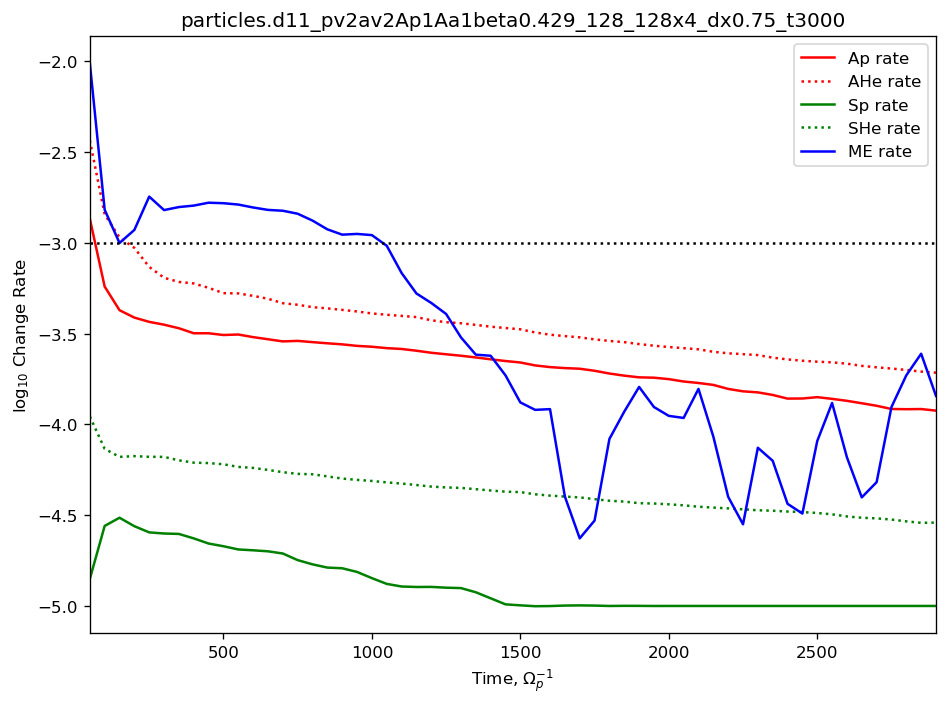

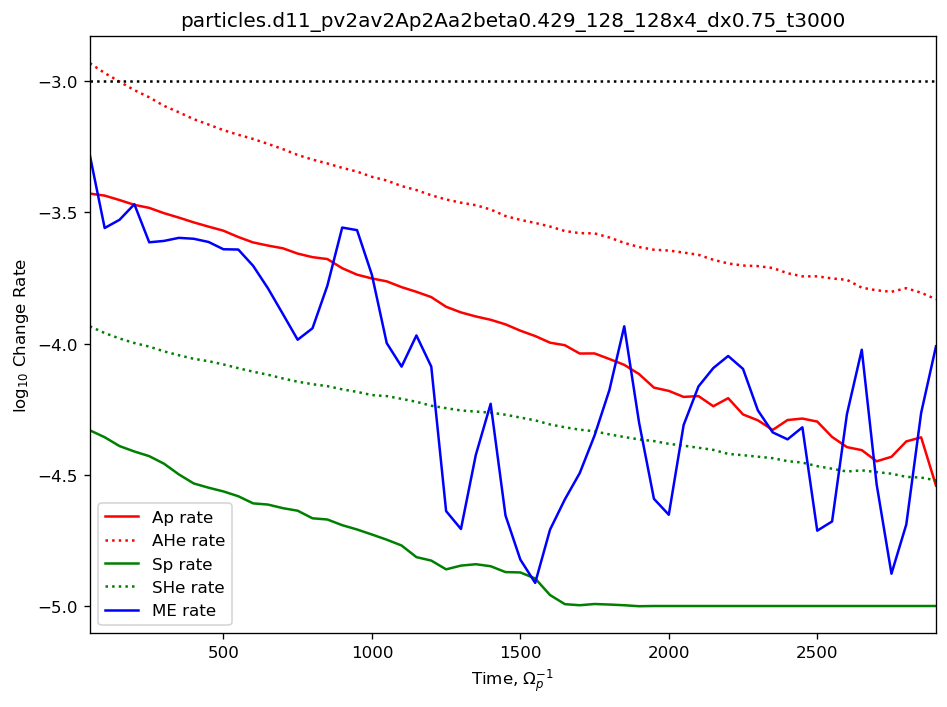

In [17]:
def visualize_changerates(times, an_p, an_he, me, en_p, en_he, simname):
    an_p = np.abs(an_p)
    an_he = np.abs(an_he)
    me = np.abs(me)
    en_p = np.abs(en_p)
    en_he = np.abs(en_he)
    an_p[np.where(an_p < 1e-5)] = 1e-5
    an_he[np.where(an_he < 1e-5)] = 1e-5
    me[np.where(me < 1e-5)] = 1e-5
    en_p[np.where(en_p < 1e-5)] = 1e-5
    en_he[np.where(en_he < 1e-5)] = 1e-5
    im, ax = plt.subplots(1, 1, figsize = (8, 6), dpi=120)
    ax.plot(times, savgol_filter(np.log10(an_p), window_length=5, polyorder=3), label='Ap rate', color='red')
    ax.plot(times, savgol_filter(np.log10(an_he), window_length=5, polyorder=3), label='AHe rate', color='red', linestyle=':')
    ax.plot(times, savgol_filter(np.log10(en_p), window_length=5, polyorder=3), label='Sp rate', color='green')
    ax.plot(times, savgol_filter(np.log10(en_he), window_length=5, polyorder=3), label='SHe rate', color='green', linestyle=':')
    ax.plot(times, savgol_filter(np.log10(me), window_length=5, polyorder=3), label='ME rate', color='blue')
    ax.plot([times[0], times[-1]], [-3,-3], color='black', linestyle=':')
    ax.set(xlim=[times[0], times[-1]], xlabel = r'Time, $\Omega{}_{p}^{-1}$', ylabel=r'log$_{10}$ Change Rate')
    ax.set(title=simname)
    ax.legend()
    plt.tight_layout()
    plt.show()
    return

for i in range (0, len(istart_all), 1):
    istart = istart_all[i]
    iend = iend_all[i]
    times = timep_array_all[istart:iend+1]
    an_p = labels_allmoments_an_re_all[istart:iend+1,0]
    an_he = labels_allmoments_an_re_all[istart:iend+1,1]
    me = labels_allmoments_me_re_all[istart:iend+1]
    en_p = labels_entropy_re_all[istart:iend+1,0]
    en_he = labels_entropy_re_all[istart:iend+1,1]
    simname = simnames_all[istart]
    visualize_changerates(times, an_p, an_he, me, en_p, en_he, simname)

In [19]:
en_p = np.abs(labels_entropy_re_all[:,0])
en_he = np.abs(labels_entropy_re_all[:,1])
unstable = 0
for i in range (0, len(en_p), 1):
    if ((en_p[i] >= 0.001) or (en_he[i] >= 0.001)): unstable += 1
print(unstable)

30
